# IMPORT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import random
try:
    from pmdarima.arima import auto_arima
except:
    !pip install pmdarima
    from pmdarima.arima import auto_arima
from sklearn.linear_model import LinearRegression   
font = fm.FontProperties(fname='../input/nanum34/NanumSquareR.ttf')
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.8f' % x)
%matplotlib inline

# 유동인구 데이터 로드

In [2]:
time_df_list = []
age_df_list = []
for x in [201902,201903,201904,201905,202002,202003,202004,202005]:
    time_df_list.append('../input/bigcontest-data/data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_TIME_'+str(x)+'.CSV')
    age_df_list.append('../input/bigcontest-data/data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_'+str(x)+'.CSV')
time_df = pd.concat([pd.read_csv(path,sep='|') for path in time_df_list])
age_df = pd.concat([pd.read_csv(path,sep='|') for path in age_df_list])     

In [3]:
time_df.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,201902,20190201,1114052000,소공동,1496.35000000,1022.83000000,706.51000000,547.77000000,1673.02000000,3561.05000000,...,12355.91000000,13096.69000000,9317.64000000,15029.74000000,14135.83000000,9074.02000000,6032.26000000,6047.05000000,4806.65000000,2956.11000000
1,201902,20190201,1114054000,회현동,1692.37000000,1117.26000000,839.57000000,653.41000000,1920.52000000,4687.95000000,...,18210.30000000,20292.65000000,12527.29000000,21454.63000000,18214.50000000,11914.26000000,9800.64000000,9341.24000000,6884.91000000,4034.56000000
2,201902,20190201,1114055000,명동,2226.91000000,1726.10000000,1145.43000000,894.97000000,2513.32000000,5268.51000000,...,20332.71000000,21458.64000000,14434.56000000,25855.14000000,23107.23000000,13460.05000000,9797.40000000,8719.30000000,7203.45000000,4845.48000000
3,201902,20190201,1114057000,필동,698.73000000,440.70000000,385.99000000,275.64000000,497.41000000,1990.42000000,...,6900.66000000,9789.54000000,6205.74000000,13277.25000000,12101.51000000,5698.58000000,4464.46000000,4088.53000000,3385.14000000,1746.28000000
4,201902,20190201,1114058000,장충동,768.34000000,447.23000000,429.90000000,349.46000000,507.74000000,1310.67000000,...,5187.02000000,5211.60000000,3656.54000000,6841.98000000,5810.71000000,4463.99000000,2807.25000000,2626.12000000,2415.41000000,1398.94000000


In [4]:
age_df.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201902,20190201,1114052000,소공동,16.64000000,116.18000000,419.70000000,1553.57000000,5196.07000000,11195.62000000,...,13323.19000000,12741.15000000,11628.80000000,10006.80000000,9807.06000000,8099.38000000,7260.17000000,5757.53000000,3359.85000000,4431.71000000
1,201902,20190202,1114052000,소공동,3.14000000,141.07000000,763.30000000,1405.29000000,4235.82000000,7592.34000000,...,7898.27000000,6580.27000000,5714.75000000,4946.22000000,5055.32000000,4560.27000000,4364.57000000,3838.77000000,2453.97000000,3207.26000000
2,201902,20190203,1114052000,소공동,1.38000000,120.39000000,698.23000000,1117.17000000,3032.90000000,5173.35000000,...,5079.63000000,4454.43000000,3905.32000000,3484.47000000,3703.24000000,3270.26000000,2984.05000000,2484.98000000,1511.67000000,1954.98000000
3,201902,20190204,1114052000,소공동,0.08000000,141.61000000,772.41000000,1248.85000000,3001.95000000,4641.82000000,...,4317.63000000,3676.47000000,3506.37000000,3108.99000000,3324.07000000,2841.35000000,2644.42000000,2164.35000000,1230.21000000,1520.35000000
4,201902,20190205,1114052000,소공동,0.00000000,254.70000000,1394.92000000,2190.69000000,3420.15000000,5478.30000000,...,4813.86000000,4967.92000000,5161.96000000,4856.63000000,5212.69000000,4462.94000000,4183.38000000,3265.62000000,1692.74000000,2147.09000000


In [5]:
# index를 datetime 형식으로 변환한 STD_YMD 칼럼의 값으로 변경
time_df.index=pd.to_datetime(time_df['STD_YMD'],format='%Y%m%d')
age_df.index=pd.to_datetime(time_df['STD_YMD'],format='%Y%m%d')

In [6]:
# 결측값 조사
print('시간별 유동인구 데이터프레임 null 개수:',time_df.isna().sum().sum())
print('연령대별 유동인구 데이터프레임 null 개수:',time_df.isna().sum().sum())

시간별 유동인구 데이터프레임 null 개수: 0
연령대별 유동인구 데이터프레임 null 개수: 0


In [7]:
print('2019년에 존재하고 2020년에 존재하지 않는 STD_YMD: ',*set(time_df['2019'].STD_YMD.astype(str).str[4:])-set(time_df['2020'].STD_YMD.astype(str).str[4:])) 
print('2020년에 존재하고 2019년에 존재하지 않는 STD_YMD: ',*set(time_df['2020'].STD_YMD.astype(str).str[4:])-set(time_df['2019'].STD_YMD.astype(str).str[4:]))

2019년에 존재하고 2020년에 존재하지 않는 STD_YMD: 
2020년에 존재하고 2019년에 존재하지 않는 STD_YMD:  0229


In [8]:
# 2019년 2020년 일 평균 유동인구 추세 시각화

mean_flow_2019=time_df['2019'].loc[:,'TMST_00':'TMST_23'].groupby(time_df['2019'].index).mean().sum(axis=1)
mean_flow_2020=time_df['2020'].loc[:,'TMST_00':'TMST_23'].groupby(time_df['2020'].index).mean().sum(axis=1)

In [9]:
# 2020년 윤년 2월 29일 데이터 제거
mean_flow_2020_not_leap=mean_flow_2020[mean_flow_2020.index != '2020-02-29']

In [10]:
corona=pd.read_csv('../input/coronavirusdataset/Time.csv') # 일별 코로나 확진자 관련 데이터 로드
corona=corona.drop(['test','negative','time','released','deceased'],axis=1) # 일별 누적 확진자 수, date 칼럼 제외하고 삭제
corona['date']=pd.to_datetime(corona['date'],format='%Y-%m-%d') # datetime 변수로 date 칼럼 변경
corona=corona.set_index('date').diff().fillna(1.0).astype(int) # date 칼럼을 index로 설정

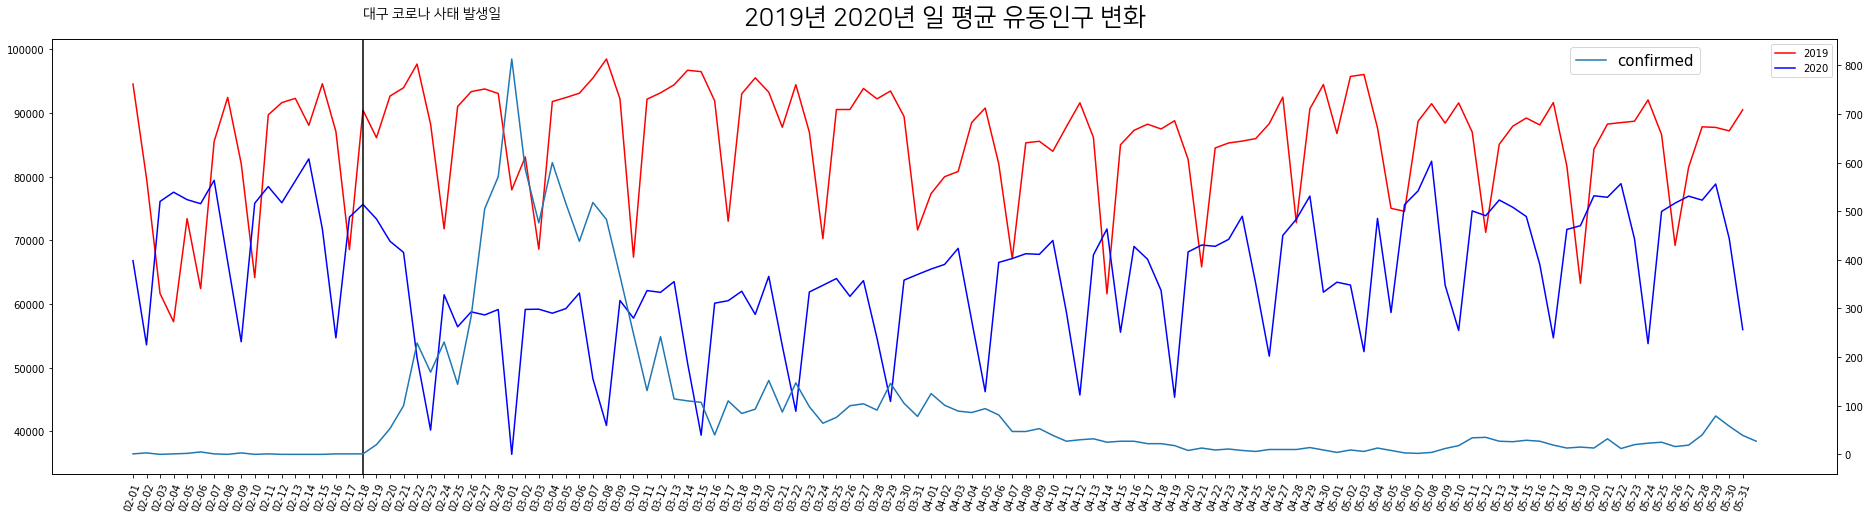

In [11]:
fig,ax=plt.subplots(figsize=(32,8))
sns.lineplot(data=mean_flow_2019.reset_index(drop=True),c='r',ax=ax,label='2019')
sns.lineplot(data=mean_flow_2020_not_leap.reset_index(drop=True),c='b',ax=ax,label='2020')
ax2=ax.twinx()
sns.lineplot(data=corona[(corona.index>='2020-02')&(corona.index<'2020-06')].reset_index(drop=True),c='k',ax=ax2)
ax.axvline(17,c='k')
plt.text(17,900,'대구 코로나 사태 발생일',fontproperties=font,size=14,c='k')
# ax.set_xticklabels(np.arange(min(mean_flow_2020.index),max(mean_flow_2020.index),7))
plt.xticks(np.arange(0, 120, 1.0))
plt.title('2019년 2020년 일 평균 유동인구 변화',fontproperties=font,size=25,pad=15)
ax.set_xticklabels(labels=mean_flow_2020_not_leap.index.astype(str).str[5:],rotation=70)
ax2.legend(loc=[0.85,0.92],fontsize=15)
plt.show()

In [12]:
month_flow_2019=mean_flow_2019.resample('M').mean()
month_flow_2020=mean_flow_2020.resample('M').mean()

In [13]:
month_flow_2019.index=month_flow_2019.index.month
month_flow_2020.index=month_flow_2020.index.month

In [14]:
month_flow=pd.DataFrame(month_flow_2019,columns=['2019'])
month_flow.index.name = 'week'
month_flow['2020']=month_flow_2020
month_flow

,2019,2020
week,,
2,84178.97018116,66806.90901549
3,88420.39996727,56859.88116877
4,83794.04681643,64491.26511594
5,85588.64787751,69985.43064984


In [15]:
month_flow=month_flow.reset_index().melt(id_vars='week')
month_flow

,week,variable,value
0,2,2019,84178.97018116
1,3,2019,88420.39996727
2,4,2019,83794.04681643
3,5,2019,85588.64787751
4,2,2020,66806.90901549
5,3,2020,56859.88116877
6,4,2020,64491.26511594
7,5,2020,69985.43064984


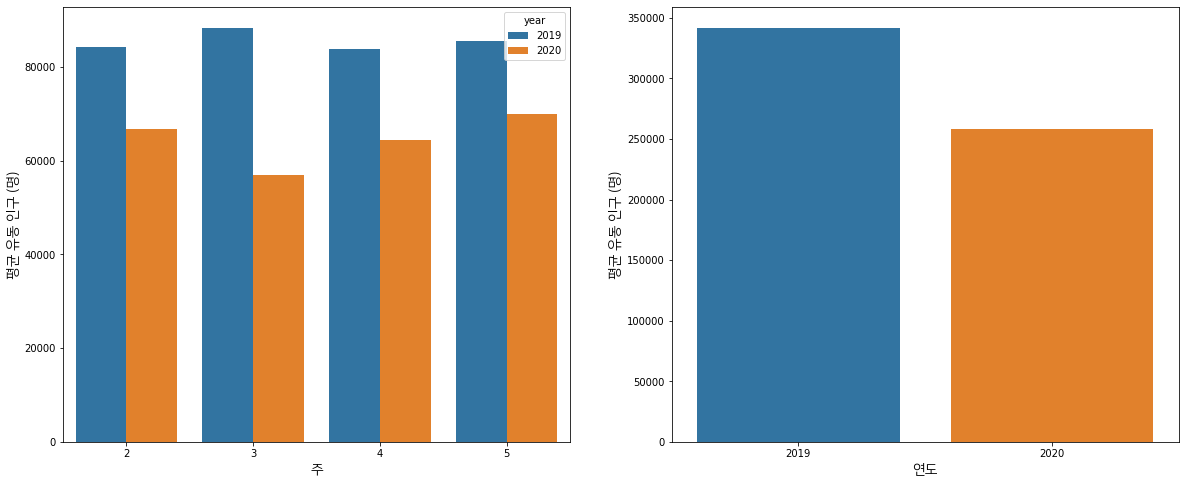

In [16]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(data=month_flow,x='week',y='value',hue='variable',ax=ax[0])
ax[0].set_xlabel('주',fontproperties=font,size=14)
ax[0].set_ylabel('평균 유동 인구 (명)',fontproperties=font,size=14)
ax[0].legend(title='year')
sns.barplot(data=month_flow.groupby('variable').sum(),x=month_flow.groupby('variable').sum().index,y='value',ax=ax[1])
ax[1].set_xlabel('연도',fontproperties=font,size=14)
ax[1].set_ylabel('평균 유동 인구 (명)',fontproperties=font,size=14)
plt.show()

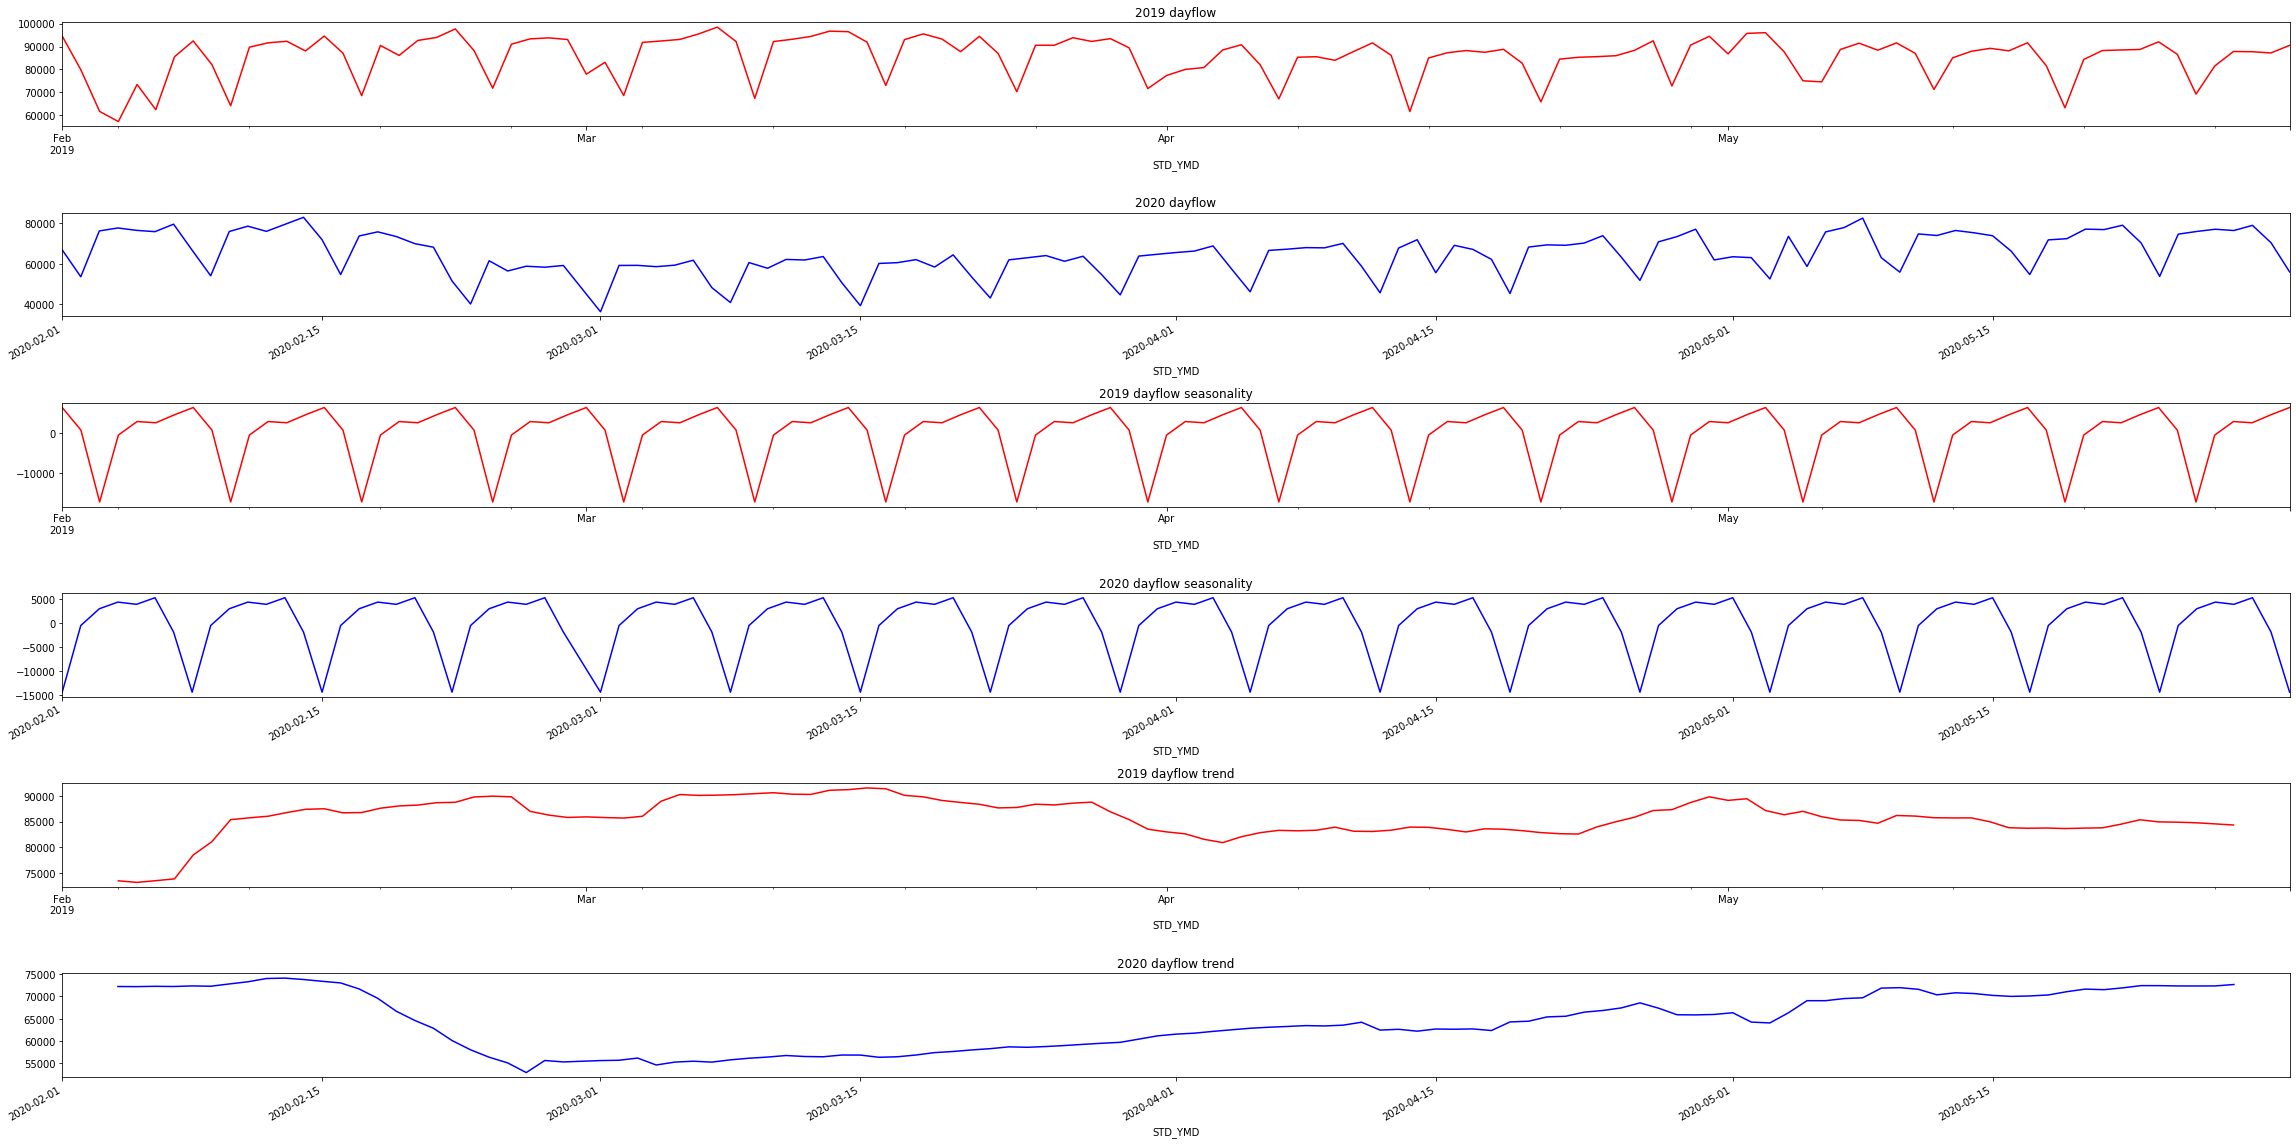

In [17]:
df_2019=mean_flow_2019
df_2020=mean_flow_2020_not_leap
fig,ax=plt.subplots(6,1,figsize=(32,16))
decom = sm.tsa.seasonal_decompose(df_2019,freq=7)
decom_2 = sm.tsa.seasonal_decompose(df_2020,freq=7)
decom.observed.plot(ax=ax[0],title='2019 dayflow',c='red')
decom.seasonal.plot(ax=ax[2],title='2019 dayflow seasonality',c='red')
decom.trend.plot(ax=ax[4],title='2019 dayflow trend',c='red')
decom_2.observed.plot(ax=ax[1],title='2020 dayflow',c='blue')
decom_2.seasonal.plot(ax=ax[3],title='2020 dayflow seasonality',c='blue')
decom_2.trend.plot(ax=ax[5],title='2020 dayflow trend',c='blue')
ax[1].set_xlim(['2020-02-01','2020-05-31'])
ax[3].set_xlim(['2020-02-01','2020-05-31'])
ax[5].set_xlim(['2020-02-01','2020-05-31'])
plt.tight_layout()
plt.show()

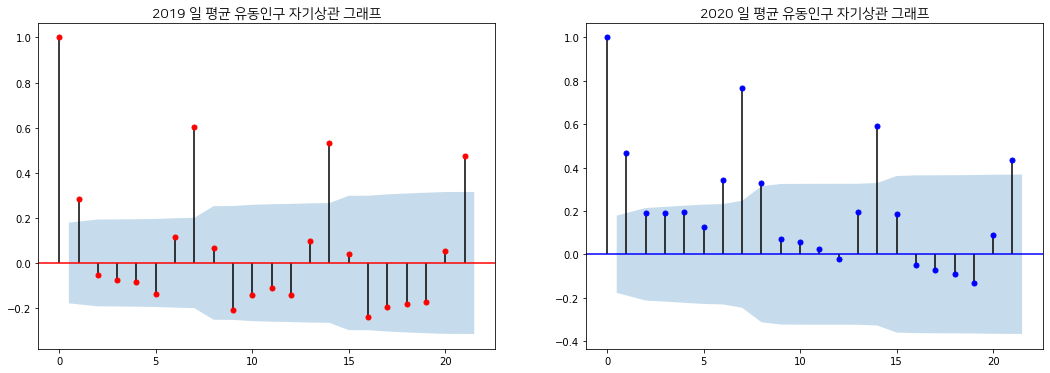

In [18]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
plot=plot_acf(mean_flow_2019,ax=ax[0],c='r') 
plot=plot_acf(mean_flow_2020,ax=ax[1],c='b')
ax[0].set_title('2019 일 평균 유동인구 자기상관 그래프',fontproperties=font,size=14)
ax[1].set_title('2020 일 평균 유동인구 자기상관 그래프',fontproperties=font,size=14)
plt.show() # Autocorrelation graph를 통해 7일 주기 확인 (주 단위 분석 필요)

In [19]:
week_flow_2019 = mean_flow_2019.copy()
week_flow_2020 = mean_flow_2020.copy()

In [20]:
week_flow_2019.index=week_flow_2019.index.week
week_flow_2020.index=week_flow_2020.index.week

In [21]:
week_flow_2019=pd.DataFrame(week_flow_2019,columns=['유동인구'])
week_flow_2020=pd.DataFrame(week_flow_2020,columns=['유동인구'])
week_flow_2019.index.names = ['week']
week_flow_2020.index.names = ['week']

In [22]:
week_flow_2019=week_flow_2019.groupby(week_flow_2019.index).mean()[1:-1] # 2월 초 / 5월 말 7일 미만 주 삭제
week_flow_2020=week_flow_2020.groupby(week_flow_2020.index).mean()[1:-1] 

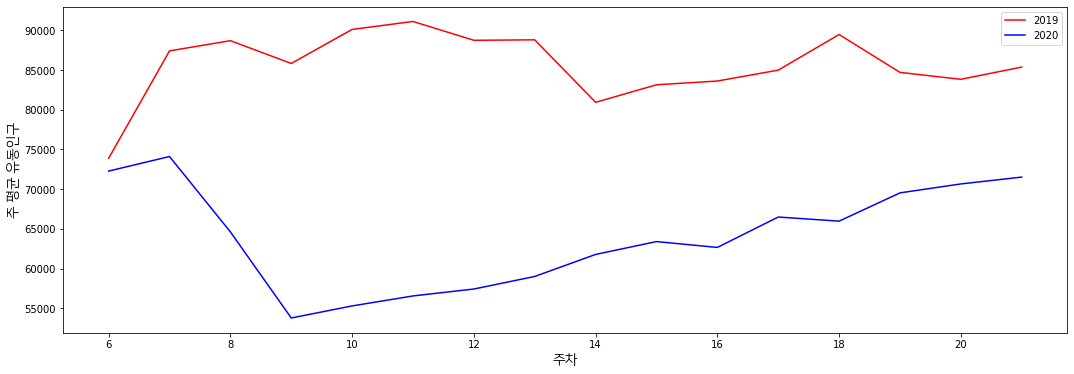

In [23]:
fig,ax=plt.subplots(figsize=(18,6))
week_flow_2019.plot(ax=ax,label='2019',c='r')
week_flow_2020.plot(ax=ax,label='2020',c='b')
plt.legend(['2019','2020'])
ax.set_ylabel('주 평균 유동인구',fontproperties=font,size=14)
ax.set_xlabel('주차',fontproperties=font,size=14)
plt.show()

In [24]:
week_flow_change=week_flow_2020-week_flow_2019 # 2020년 2019 동일 주 평균 유동인구 변화량 
week_flow_change.head()

,유동인구
week,
6,-1609.58364389
7,-13302.41981366
8,-24078.34527950
9,-32050.38496894
10,-34818.61766046


In [25]:
corona_2_5=corona[(corona.index>='2020-02')&(corona.index<'2020-06')] # 2020년 2월 ~5월 확진자 데이터 추출

In [26]:
corona_2_5.index = corona_2_5.index.week
corona_2_5.index.names = ['week']

In [27]:
corona_week_confirmed=corona_2_5.groupby(corona_2_5.index).sum()


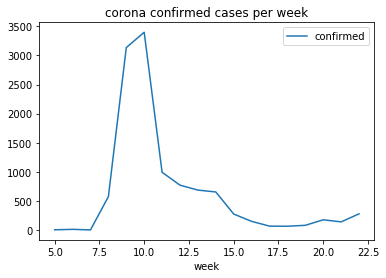

In [28]:
corona_week_confirmed.plot(title='corona confirmed cases per week')
plt.show()

In [29]:
week_flow_confirmed=pd.merge(week_flow_change,corona_week_confirmed,left_index=True,right_index=True)
week_flow_confirmed

,유동인구,confirmed
week,,
6,-1609.58364389,12
7,-13302.41981366,2
8,-24078.34527950,573
9,-32050.38496894,3134
10,-34818.61766046,3398
11,-34564.31583851,992
12,-31321.85703934,771
13,-29799.66356108,686
14,-19154.44184265,654


In [30]:
pd.merge(week_flow_change,corona_week_confirmed,left_index=True,right_index=True).corr() # -0.682545로 어느정도 유의한 상관관계를 가지고 있었다

,유동인구,confirmed
유동인구,1.00000000,-0.68254543
confirmed,-0.68254543,1.00000000


In [32]:
offline_sales=pd.read_excel('../input/bigcontest-data/data/04_유통데이터(GS리테일)/04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx',sheet_name='종합테이블(TB_DD_STR_PURCH_CLS)')

In [33]:
offline_sales.head()

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,20190201,대구광역시,수성구,고산1동,1.06433557,0.45084761,0.17222093,0.29545809,0.02326287,0.04467943,0.00507460,0.00481966,0.00363682
1,20190201,대구광역시,수성구,고산2동,1.07641799,0.45793662,0.19627353,0.29556381,0.00552103,0.03405573,0.00084376,0.00889254,0.00091298
2,20190201,대구광역시,수성구,고산3동,0.85607140,0.35997760,0.19660249,0.37676160,0.01340777,0.02960601,0.00911737,0.00883059,0.00569657
3,20190201,대구광역시,수성구,두산동,0.72486779,0.28196869,0.17520737,0.36320214,0.02423468,0.13419099,0.00000000,0.02119613,0.00000000
4,20190201,대구광역시,수성구,만촌1동,1.15572808,0.40098349,0.20045413,0.31053125,0.03886803,0.03542653,0.00528373,0.00573365,0.00271919


In [34]:
offline_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14460 entries, 0 to 14459
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OPER_DT    14460 non-null  int64  
 1   PVN        14460 non-null  object 
 2   BOR        14460 non-null  object 
 3   ADMD       14460 non-null  object 
 4   AMT_IND    14460 non-null  float64
 5   LCLS_10_P  14460 non-null  float64
 6   LCLS_20_P  14460 non-null  float64
 7   LCLS_30_P  14460 non-null  float64
 8   LCLS_40_P  14460 non-null  float64
 9   LCLS_50_P  14460 non-null  float64
 10  LCLS_60_P  14460 non-null  float64
 11  LCLS_70_P  14460 non-null  float64
 12  LCLS_80_P  14460 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.4+ MB


In [35]:
card_df=pd.read_csv('../input/bigcontest-data/data/02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt',encoding='CP949',sep='\t')

In [36]:
offline_sales['year'] = offline_sales['OPER_DT'].astype(str).str[:4]
offline_sales['OPER_DT'] = pd.to_datetime(offline_sales['OPER_DT'],format="%Y%m%d")
offline_sales.head() # LCLS_10_P ~ LCLS_80_P 의 경우 비중을 나타내는 칼럼이므로 매출지수인 AMT_IND를 곱해 상품별 매출 지수를 나타내도록 한다.

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,year
0,2019-02-01,대구광역시,수성구,고산1동,1.06433557,0.45084761,0.17222093,0.29545809,0.02326287,0.04467943,0.00507460,0.00481966,0.00363682,2019
1,2019-02-01,대구광역시,수성구,고산2동,1.07641799,0.45793662,0.19627353,0.29556381,0.00552103,0.03405573,0.00084376,0.00889254,0.00091298,2019
2,2019-02-01,대구광역시,수성구,고산3동,0.85607140,0.35997760,0.19660249,0.37676160,0.01340777,0.02960601,0.00911737,0.00883059,0.00569657,2019
3,2019-02-01,대구광역시,수성구,두산동,0.72486779,0.28196869,0.17520737,0.36320214,0.02423468,0.13419099,0.00000000,0.02119613,0.00000000,2019
4,2019-02-01,대구광역시,수성구,만촌1동,1.15572808,0.40098349,0.20045413,0.31053125,0.03886803,0.03542653,0.00528373,0.00573365,0.00271919,2019


In [37]:
offline_sales.loc[:,'LCLS_10_P':'LCLS_80_P']=offline_sales.loc[:,'LCLS_10_P':'LCLS_80_P'].multiply(offline_sales['AMT_IND'],axis=0)
# LCLS_10_P ~ LCLS_80_P 의 경우 비중을 나타내는 칼럼이므로 매출지수인 AMT_IND를 곱해 상품별 매출 지수를 나타내도록 한다.
offline_sales.head()

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,year
0,2019-02-01,대구광역시,수성구,고산1동,1.06433557,0.47985315,0.18330086,0.31446655,0.02475950,0.04755390,0.00540108,0.00512974,0.00387079,2019
1,2019-02-01,대구광역시,수성구,고산2동,1.07641799,0.49293122,0.21127236,0.31815020,0.00594294,0.03665820,0.00090823,0.00957209,0.00098275,2019
2,2019-02-01,대구광역시,수성구,고산3동,0.85607140,0.30816652,0.16830577,0.32253483,0.01147801,0.02534486,0.00780512,0.00755961,0.00487667,2019
3,2019-02-01,대구광역시,수성구,두산동,0.72486779,0.20439002,0.12700218,0.26327353,0.01756694,0.09727073,0.00000000,0.01536439,0.00000000,2019
4,2019-02-01,대구광역시,수성구,만촌1동,1.15572808,0.46342788,0.23167047,0.35888968,0.04492088,0.04094344,0.00610655,0.00662655,0.00314264,2019


In [38]:
reshaped_sales_df=offline_sales.loc[:,'AMT_IND':].melt(id_vars=['year']).groupby(['variable','year']).mean().reset_index()
reshaped_sales_df

,variable,year,value
0,AMT_IND,2019,1.11598275
1,AMT_IND,2020,0.94319877
2,LCLS_10_P,2019,0.35483707
3,LCLS_10_P,2020,0.29127686
4,LCLS_20_P,2019,0.24476290
5,LCLS_20_P,2020,0.21790719
6,LCLS_30_P,2019,0.40077378
7,LCLS_30_P,2020,0.32461994
8,LCLS_40_P,2019,0.03019167
9,LCLS_40_P,2020,0.02934665


In [39]:
offline_sales.loc[:,'AMT_IND':]

,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,year
0,1.06433557,0.47985315,0.18330086,0.31446655,0.02475950,0.04755390,0.00540108,0.00512974,0.00387079,2019
1,1.07641799,0.49293122,0.21127236,0.31815020,0.00594294,0.03665820,0.00090823,0.00957209,0.00098275,2019
2,0.85607140,0.30816652,0.16830577,0.32253483,0.01147801,0.02534486,0.00780512,0.00755961,0.00487667,2019
3,0.72486779,0.20439002,0.12700218,0.26327353,0.01756694,0.09727073,0.00000000,0.01536439,0.00000000,2019
4,1.15572808,0.46342788,0.23167047,0.35888968,0.04492088,0.04094344,0.00610655,0.00662655,0.00314264,2019
...,...,...,...,...,...,...,...,...,...,...
14455,1.59503787,0.50118794,0.35264203,0.54918286,0.04179657,0.11180294,0.01012394,0.02159836,0.00670322,2020
14456,1.38918413,0.38387689,0.30731038,0.50521957,0.07488666,0.10691569,0.00221173,0.00049083,0.00827238,2020
14457,0.71426489,0.21666370,0.13400709,0.26454323,0.02779038,0.05671807,0.00558980,0.00592728,0.00302533,2020
14458,1.13418966,0.30022879,0.29192563,0.41624918,0.03305010,0.08026692,0.00120252,0.00413565,0.00713088,2020


In [41]:
category_cd_to_name = pd.read_excel('../input/bigcontest-data/data/04_유통데이터(GS리테일)/04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx',sheet_name='참고)분석용상품대분류코드')

In [42]:
category_cd_to_name

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,nan,분석용상품대분류코드,분석용상품대분류명,상품 예시
1,nan,10,식사,"F/F, 김치, 통조림, 즉석식품"
2,nan,20,간식,"견과, 스낵, 껌/캔디/젤리, 과일"
3,nan,30,마실거리,"음료, 유제품"
4,nan,40,홈&리빙,"라이터, 건전지, 일회용품, 방향제"
5,nan,50,헬스&뷰티,"마스크, 샴푸, 린스, 칫솔"
6,nan,60,취미&여가활동,"완구, 대형가전, 애완동물, 레져"
7,nan,70,사회활동,"문구, 소형가전(이어폰 등)"
8,nan,80,임신/육아,"유아, 인형"


In [43]:
category_dict=category_cd_to_name.iloc[:,1:3][1:].set_index('Unnamed: 1').to_dict()['Unnamed: 2']
print(category_dict)

{10: '식사', 20: '간식', 30: '마실거리', 40: '홈&리빙', 50: '헬스&뷰티', 60: '취미&여가활동', 70: '사회활동', 80: '임신/육아'}


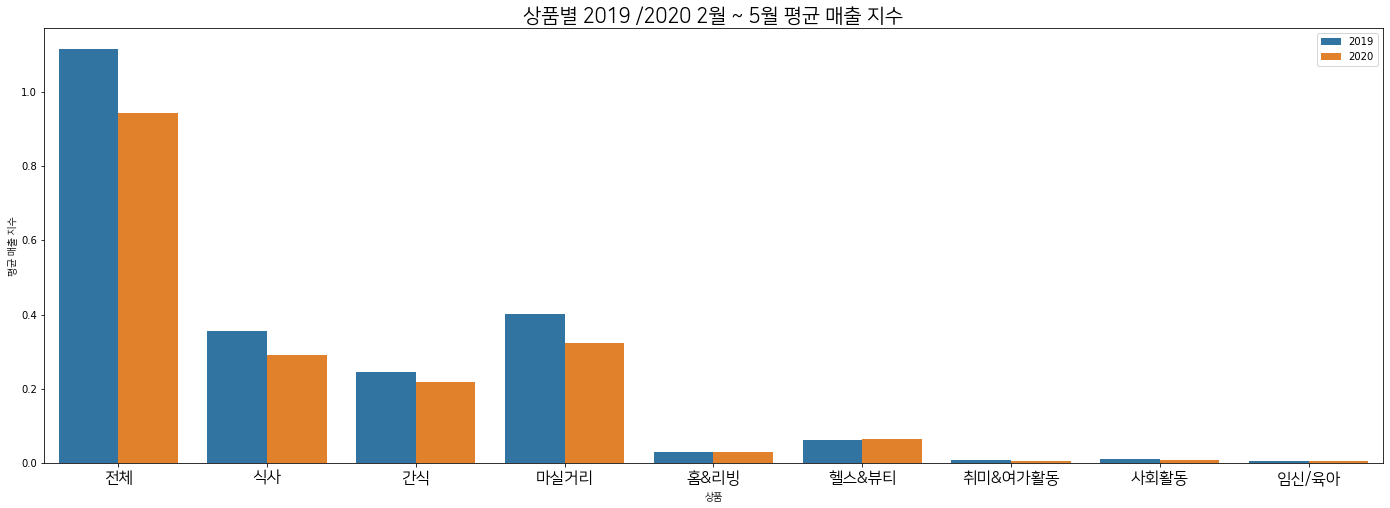

In [44]:
fig,ax=plt.subplots(figsize=(24,8))
sns.barplot(data=reshaped_sales_df,x='variable',y='value',hue='year')
ax.set_xticklabels(['전체']+list(category_dict.values()),fontproperties=font,size=16)
ax.set_title('상품별 2019 /2020 2월 ~ 5월 평균 매출 지수',fontproperties=font,size=20)
ax.set_xlabel('상품',fontproperties=font)
ax.set_ylabel('평균 매출 지수',fontproperties=font)
ax.legend()#bew
plt.show()

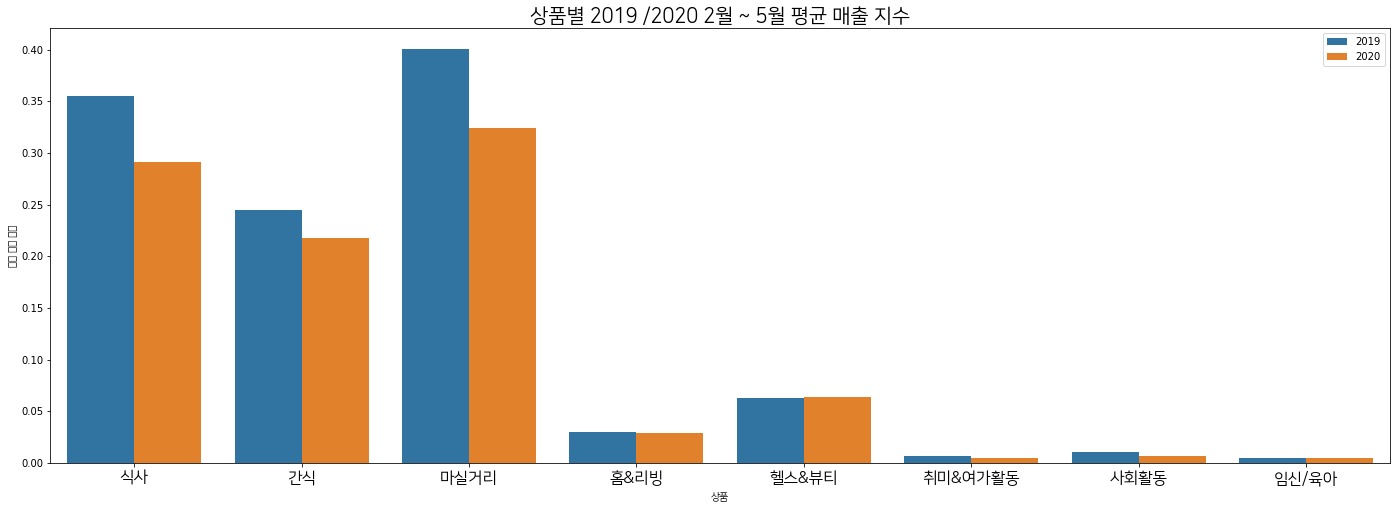

In [45]:
fig,ax=plt.subplots(figsize=(24,8))
sns.barplot(data=reshaped_sales_df[2:],x='variable',y='value',hue='year')
ax.set_xticklabels(list(category_dict.values()),fontproperties=font,size=16)
ax.set_title('상품별 2019 /2020 2월 ~ 5월 평균 매출 지수',fontproperties=font,size=20)
ax.set_xlabel('상품',fontproperties=font)
ax.set_ylabel('평균 매출 지수')
ax.legend()
plt.show() #new

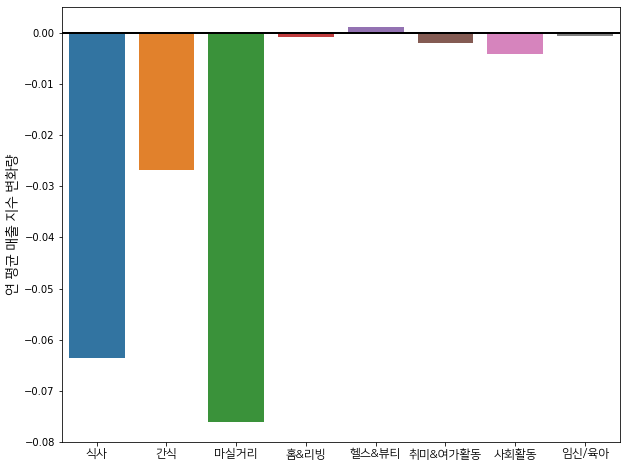

In [46]:
fig,ax=plt.subplots(figsize=(10,8))
sales_change=pd.DataFrame(reshaped_sales_df[2:].sort_values('year')['value'].diff(8).dropna().reset_index(drop=True))
sns.barplot(data=sales_change,x=sales_change.index,y='value')
ax.set_xticklabels(list(category_dict.values()),fontproperties=font,rotation=0,size=12)
ax.set_ylabel('연 평균 매출 지수 변화량',fontproperties=font,size=14)
ax.axhline(0,linewidth=2,c='k')
plt.show()

In [47]:
temp=reshaped_sales_df[2:].sort_values('year') #매출 지수 변화율을 위한 dataframe 구조변경
temp.head()

,variable,year,value
2,LCLS_10_P,2019,0.35483707
4,LCLS_20_P,2019,0.24476290
6,LCLS_30_P,2019,0.40077378
8,LCLS_40_P,2019,0.03019167
10,LCLS_50_P,2019,0.06256217


In [48]:
offline_sales.loc[:,'LCLS_10_P':'LCLS_80_P']

,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,0.47985315,0.18330086,0.31446655,0.02475950,0.04755390,0.00540108,0.00512974,0.00387079
1,0.49293122,0.21127236,0.31815020,0.00594294,0.03665820,0.00090823,0.00957209,0.00098275
2,0.30816652,0.16830577,0.32253483,0.01147801,0.02534486,0.00780512,0.00755961,0.00487667
3,0.20439002,0.12700218,0.26327353,0.01756694,0.09727073,0.00000000,0.01536439,0.00000000
4,0.46342788,0.23167047,0.35888968,0.04492088,0.04094344,0.00610655,0.00662655,0.00314264
...,...,...,...,...,...,...,...,...
14455,0.50118794,0.35264203,0.54918286,0.04179657,0.11180294,0.01012394,0.02159836,0.00670322
14456,0.38387689,0.30731038,0.50521957,0.07488666,0.10691569,0.00221173,0.00049083,0.00827238
14457,0.21666370,0.13400709,0.26454323,0.02779038,0.05671807,0.00558980,0.00592728,0.00302533
14458,0.30022879,0.29192563,0.41624918,0.03305010,0.08026692,0.00120252,0.00413565,0.00713088


In [49]:
temp_2019=temp[temp.year=='2019'].set_index('variable').drop('year',axis=1)
temp_2020=temp[temp.year=='2020'].set_index('variable').drop('year',axis=1)

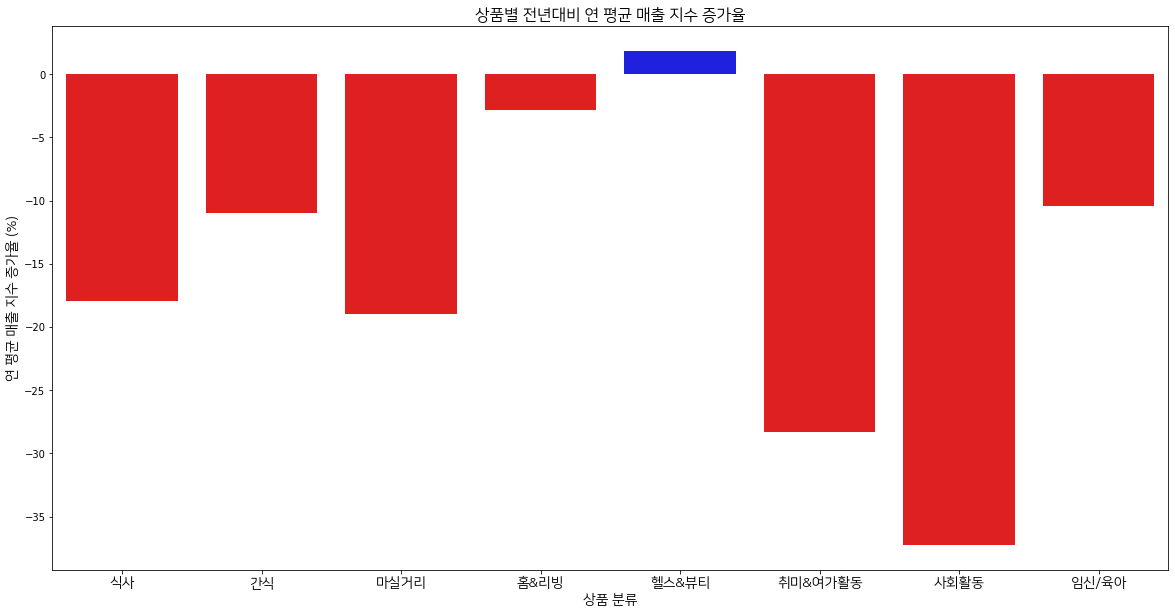

In [50]:
temp_change_percent=((temp_2020-temp_2019)/temp_2019)*100
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=temp_change_percent,x=temp_change_percent.index,y='value',ax=ax,palette=['r','r','r','r','b','r','r','r'])
ax.set_xticklabels(list(category_dict.values()),fontproperties=font,rotation=0,size=14)
ax.set_ylabel('연 평균 매출 지수 증가율 (%)',fontproperties=font,size=14)
ax.set_xlabel('상품 분류',fontproperties=font,size=14)
ax.set_title('상품별 전년대비 연 평균 매출 지수 증가율',fontproperties=font,size=16)
plt.show()  # 홈 ㄹ

In [51]:
offline_sales

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,year
0,2019-02-01,대구광역시,수성구,고산1동,1.06433557,0.47985315,0.18330086,0.31446655,0.02475950,0.04755390,0.00540108,0.00512974,0.00387079,2019
1,2019-02-01,대구광역시,수성구,고산2동,1.07641799,0.49293122,0.21127236,0.31815020,0.00594294,0.03665820,0.00090823,0.00957209,0.00098275,2019
2,2019-02-01,대구광역시,수성구,고산3동,0.85607140,0.30816652,0.16830577,0.32253483,0.01147801,0.02534486,0.00780512,0.00755961,0.00487667,2019
3,2019-02-01,대구광역시,수성구,두산동,0.72486779,0.20439002,0.12700218,0.26327353,0.01756694,0.09727073,0.00000000,0.01536439,0.00000000,2019
4,2019-02-01,대구광역시,수성구,만촌1동,1.15572808,0.46342788,0.23167047,0.35888968,0.04492088,0.04094344,0.00610655,0.00662655,0.00314264,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14455,2020-05-31,서울특별시,중구,중림동,1.59503787,0.50118794,0.35264203,0.54918286,0.04179657,0.11180294,0.01012394,0.02159836,0.00670322,2020
14456,2020-05-31,서울특별시,중구,청구동,1.38918413,0.38387689,0.30731038,0.50521957,0.07488666,0.10691569,0.00221173,0.00049083,0.00827238,2020
14457,2020-05-31,서울특별시,중구,필동,0.71426489,0.21666370,0.13400709,0.26454323,0.02779038,0.05671807,0.00558980,0.00592728,0.00302533,2020
14458,2020-05-31,서울특별시,중구,황학동,1.13418966,0.30022879,0.29192563,0.41624918,0.03305010,0.08026692,0.00120252,0.00413565,0.00713088,2020


In [52]:
day_offline=offline_sales.groupby('OPER_DT').mean() # 일 평균 산업별 매출 지수를 표현하는 dataframe 생성

In [53]:
day_offline.index = pd.to_datetime(day_offline.index,format='%Y%m%d')
day_offline.head()

,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
OPER_DT,,,,,,,,,
2019-02-01,1.13094030,0.39135777,0.23068841,0.35810833,0.04041568,0.08376259,0.01249643,0.01038700,0.00372409
2019-02-02,1.03919596,0.33334560,0.23649460,0.35846665,0.02730226,0.06071114,0.00775979,0.01083540,0.00428051
2019-02-03,0.96989664,0.30689526,0.21596338,0.30140418,0.02186070,0.10429736,0.00628242,0.00959503,0.00359831
2019-02-04,0.95381152,0.29413040,0.22733154,0.31664876,0.02350532,0.06422237,0.00930161,0.01378358,0.00488795
2019-02-05,1.06795862,0.28699447,0.27723889,0.37439009,0.02376167,0.07332635,0.01025910,0.01327706,0.00871099


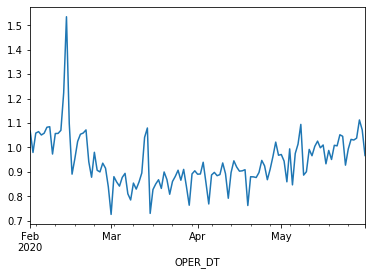

In [54]:
day_offline['AMT_IND']['2020'].plot() # 이상치 발견 2월 중순 / 3월 중순
plt.show()

In [55]:
day_offline['2020'].AMT_IND.sort_values(ascending=False)

OPER_DT
2020-02-14   1.53462061
2020-02-13   1.22362887
2020-05-29   1.11261437
2020-02-15   1.09780872
2020-05-08   1.09438767
                ...    
2020-04-05   0.76906873
2020-03-29   0.76397627
2020-04-19   0.76280106
2020-03-15   0.73053572
2020-03-01   0.72640725
Name: AMT_IND, Length: 121, dtype: float64

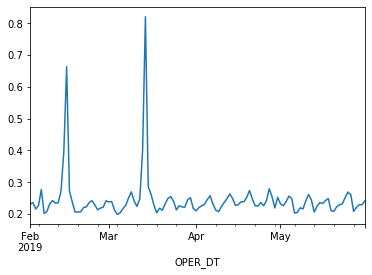

In [56]:
day_offline.loc['2019-02':'2019-05']['LCLS_20_P'].plot() # 간식에서 2,3월  13일 14일 폭등  /  4월 부터 X

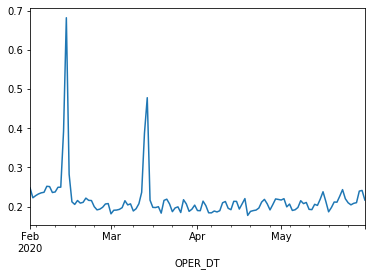

In [57]:
day_offline.loc['2020-02':'2020-08']['LCLS_20_P'].plot() # 간식에서 2,3월  13일 14일 폭등  /  4월 부터 X

In [58]:
corona

,confirmed
date,
2020-01-20,1
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,1
...,...
2020-06-26,39
2020-06-27,51
2020-06-28,62


In [59]:
offline_sales

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,year
0,2019-02-01,대구광역시,수성구,고산1동,1.06433557,0.47985315,0.18330086,0.31446655,0.02475950,0.04755390,0.00540108,0.00512974,0.00387079,2019
1,2019-02-01,대구광역시,수성구,고산2동,1.07641799,0.49293122,0.21127236,0.31815020,0.00594294,0.03665820,0.00090823,0.00957209,0.00098275,2019
2,2019-02-01,대구광역시,수성구,고산3동,0.85607140,0.30816652,0.16830577,0.32253483,0.01147801,0.02534486,0.00780512,0.00755961,0.00487667,2019
3,2019-02-01,대구광역시,수성구,두산동,0.72486779,0.20439002,0.12700218,0.26327353,0.01756694,0.09727073,0.00000000,0.01536439,0.00000000,2019
4,2019-02-01,대구광역시,수성구,만촌1동,1.15572808,0.46342788,0.23167047,0.35888968,0.04492088,0.04094344,0.00610655,0.00662655,0.00314264,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14455,2020-05-31,서울특별시,중구,중림동,1.59503787,0.50118794,0.35264203,0.54918286,0.04179657,0.11180294,0.01012394,0.02159836,0.00670322,2020
14456,2020-05-31,서울특별시,중구,청구동,1.38918413,0.38387689,0.30731038,0.50521957,0.07488666,0.10691569,0.00221173,0.00049083,0.00827238,2020
14457,2020-05-31,서울특별시,중구,필동,0.71426489,0.21666370,0.13400709,0.26454323,0.02779038,0.05671807,0.00558980,0.00592728,0.00302533,2020
14458,2020-05-31,서울특별시,중구,황학동,1.13418966,0.30022879,0.29192563,0.41624918,0.03305010,0.08026692,0.00120252,0.00413565,0.00713088,2020


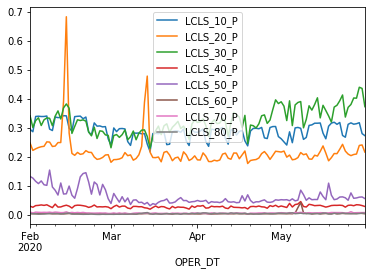

In [60]:
day_offline['2020'].iloc[:,1:].plot()

# SARIMAX MODEL

## 식사

In [61]:
category_dict

{10: '식사',
 20: '간식',
 30: '마실거리',
 40: '홈&리빙',
 50: '헬스&뷰티',
 60: '취미&여가활동',
 70: '사회활동',
 80: '임신/육아'}

In [62]:
corona=corona['2020-02':'2020-05']
corona.head()

,confirmed
date,
2020-02-01,1
2020-02-02,3
2020-02-03,0
2020-02-04,1
2020-02-05,2


In [63]:
adfuller(day_offline['LCLS_10_P']['2020'])

(-2.059832253283231,
 0.260969822995183,
 13,
 107,
 {'1%': -3.492995948509562,
  '5%': -2.888954648057252,
  '10%': -2.58139291903223},
 -649.0572791352174)

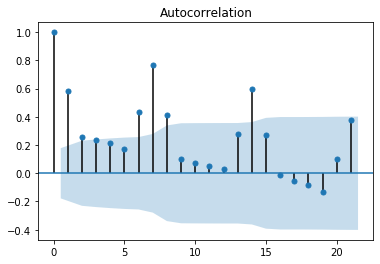

In [64]:
# {10: '식사', 20: '간식', 30: '마실거리', 40: '홈&리빙', 50: '헬스&뷰티', 60: '취미&여가활동', 70: '사회활동', 80: '임신/육아'}
g=plot_acf(day_offline['LCLS_10_P']['2020'].dropna())
# 자기상관 그래프를 통해 AR model parameter 파악

In [65]:
print(adfuller(day_offline['LCLS_10_P']['2020'])) # adfuller report

(-2.059832253283231, 0.260969822995183, 13, 107, {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}, -649.0572791352174)


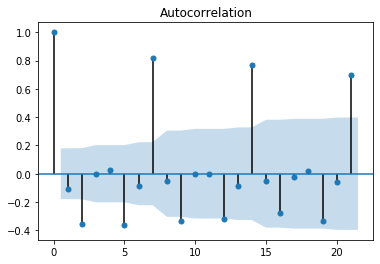

In [66]:
g=plot_acf(day_offline['LCLS_10_P']['2020'].diff().dropna())

In [67]:
print(adfuller(day_offline['LCLS_10_P']['2020'].diff().dropna()))

(-3.2595839371685686, 0.016784607353223163, 13, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, -645.8021992830584)


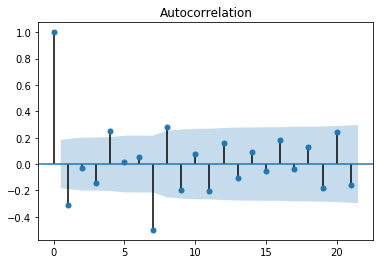

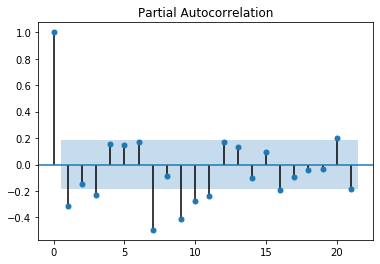

In [68]:
g=plot_acf(day_offline['LCLS_10_P']['2020'].diff().dropna().diff(7).dropna())
g2=plot_pacf(day_offline['LCLS_10_P']['2020'].diff().dropna().diff(7).dropna())

In [69]:
adfuller(day_offline['LCLS_10_P']['2020'].rolling(7).mean().dropna())

(-3.729956116137308,
 0.0037109903222976104,
 12,
 102,
 {'1%': -3.4961490537199116,
  '5%': -2.8903209639580556,
  '10%': -2.5821223452518263},
 -1030.891473189195)

In [70]:
print(adfuller(day_offline['LCLS_10_P']['2020'].diff().diff(7).dropna())) # Best d=1, S=7

(-4.491405645520322, 0.0002037920644822482, 11, 101, {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}, -612.9940175394511)


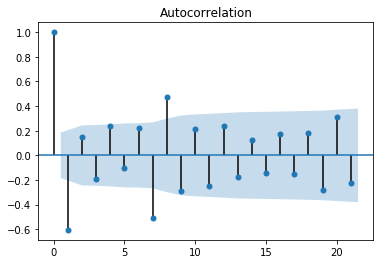

In [71]:
g=plot_acf(day_offline['LCLS_10_P']['2020'].diff().diff().diff(7).dropna()) # adfuller와 자기상관 그래프를 통한 검증 (d=1 , D=7) Best d=1, S=7

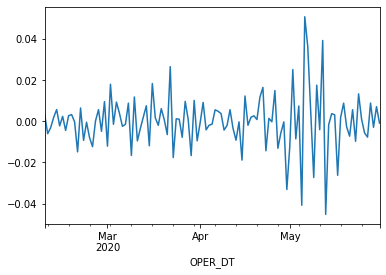

In [72]:
y=day_offline['LCLS_10_P']['2020'].diff().diff(7).dropna()
y.plot()
plt.show() # 정상시계열 / 계절성 주기 7 , 비계절성 주기 1

# SARIMAX

In [73]:
df=day_offline['2020']['LCLS_10_P']

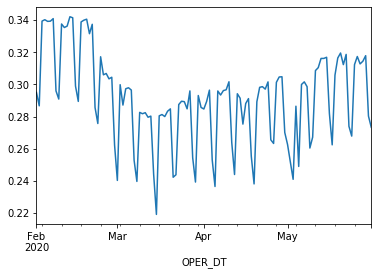

In [74]:
df.plot()
plt.show()

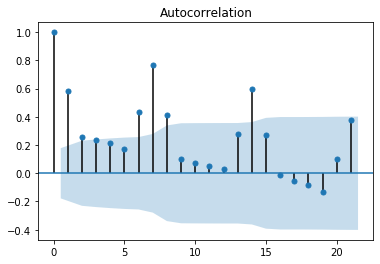

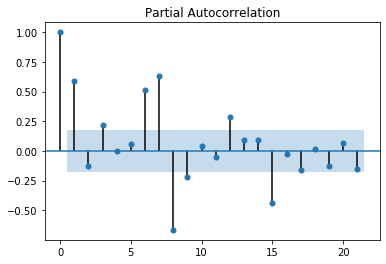

In [75]:
a=plot_acf(df)
b=plot_pacf(df)

In [76]:
print('{:.5f}'.format(adfuller(df)[1]))

0.26097


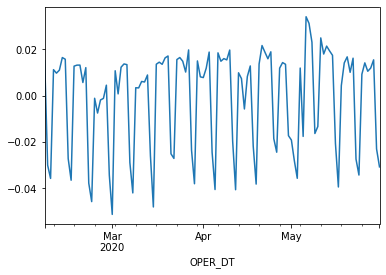

In [77]:
df_rolling=(df-df.rolling(7).mean()).dropna()
df_rolling.plot()
plt.show()

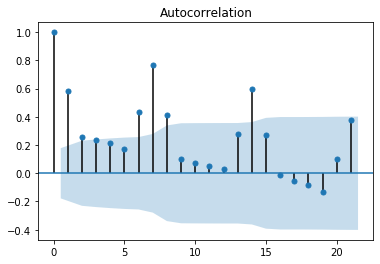

In [78]:
plot=plot_acf(df) # S 파악 어렵다 (rolling mean 적용)

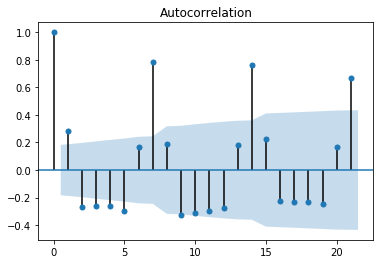

In [79]:
plot=plot_acf(df_rolling) # S = 7

0.016784607353223163


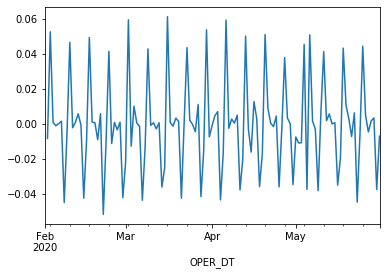

In [80]:
print(adfuller(df.diff().dropna())[1])
df.diff().plot() # 1차 차분을 통해 Trend 제거하였지만 Seasonal cycle 존재
plt.show()


(-4.491405645520322, 0.0002037920644822482, 11, 101, {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}, -612.9940175394511)


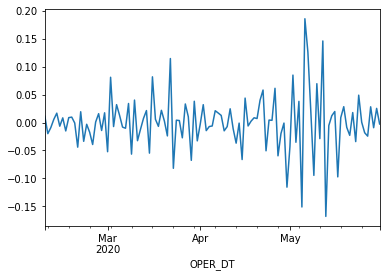

In [81]:
np.log(df).diff().diff(7).dropna().plot()
print(adfuller(df.diff().diff(7).dropna())) # 정상 시계열 p-value < 0.05

In [82]:
print('{:.5f}'.format(adfuller(np.log(df).diff().diff(7).dropna())[1]))

0.00016


(-4.555643703287396, 0.00015579837958933096, 11, 101, {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}, -354.4415154022844)


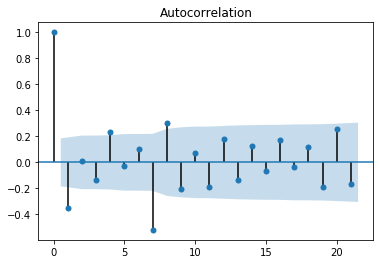

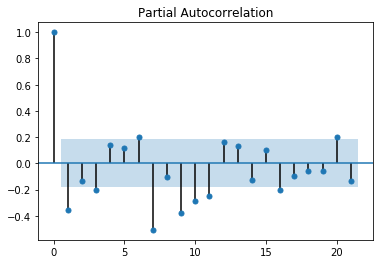

In [83]:
df_sta=np.log(df).diff().diff(7).dropna()
a=plot_acf(df_sta)
p=plot_pacf(df_sta)
print(adfuller(df_sta)) # acf pacf 통해 1차적으로 AR, MA 차수 파악

In [84]:
day_offline

,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
OPER_DT,,,,,,,,,
2019-02-01,1.13094030,0.39135777,0.23068841,0.35810833,0.04041568,0.08376259,0.01249643,0.01038700,0.00372409
2019-02-02,1.03919596,0.33334560,0.23649460,0.35846665,0.02730226,0.06071114,0.00775979,0.01083540,0.00428051
2019-02-03,0.96989664,0.30689526,0.21596338,0.30140418,0.02186070,0.10429736,0.00628242,0.00959503,0.00359831
2019-02-04,0.95381152,0.29413040,0.22733154,0.31664876,0.02350532,0.06422237,0.00930161,0.01378358,0.00488795
2019-02-05,1.06795862,0.28699447,0.27723889,0.37439009,0.02376167,0.07332635,0.01025910,0.01327706,0.00871099
...,...,...,...,...,...,...,...,...,...
2020-05-27,1.03059313,0.31271248,0.20830732,0.40290688,0.03193717,0.05754418,0.00490057,0.00728559,0.00499895
2020-05-28,1.03830581,0.31438745,0.20998556,0.40234740,0.03536580,0.05868318,0.00478805,0.00791249,0.00483589
2020-05-29,1.11261437,0.31783281,0.23949616,0.43995684,0.03465958,0.06140612,0.00615073,0.00811658,0.00499556


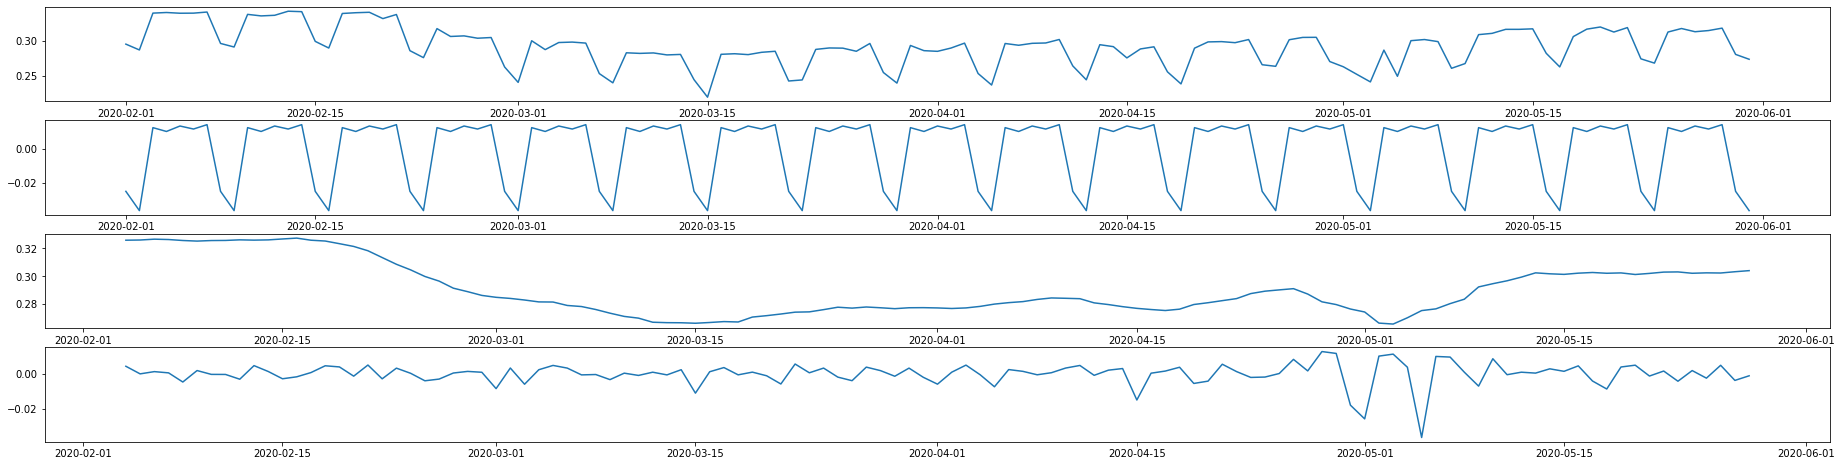

In [85]:
report=sm.tsa.seasonal_decompose(df)
fig,ax=plt.subplots(4,1,figsize=(32,8))
ax[0].plot(df)
ax[1].plot(report.seasonal)
ax[2].plot(report.trend)
ax[3].plot(report.resid) # 시계열 분해를 통해 Trend와 계절성파악
plt.show()


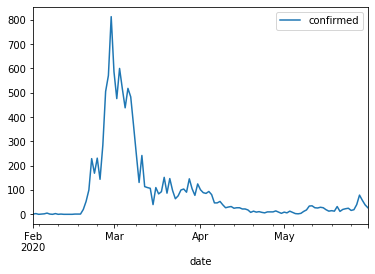

In [86]:
corona.plot()
plt.show()

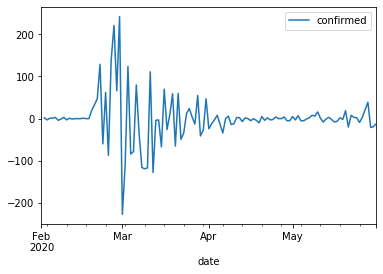

In [87]:
corona.diff().plot()
plt.show()

(-4.046839267452197, 0.0011841605248520044, 11, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 1161.5678918789504)


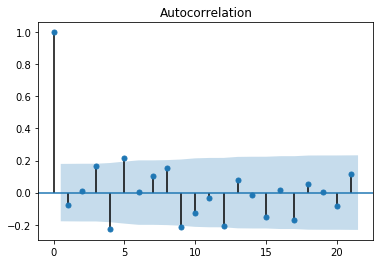

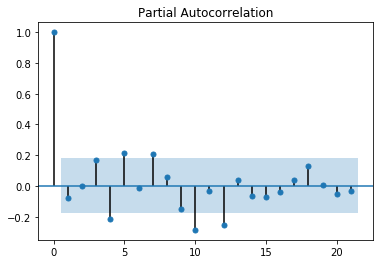

In [88]:
g=plot_acf(corona.diff().dropna())
g2=plot_pacf(corona.diff().dropna())
print(adfuller(corona.diff().dropna())) # 코로나 데이터에도 차분을 하였으나 실제 AIC value에 큰 영향이 없었다.

In [89]:
decomposition = auto_arima(np.log(day_offline['LCLS_10_P']['2020']),start_p=0,start_q=0,max_p=3,max_q=3,m=7,start_P=0,start_Q=0,seasonal=True,
                           d=1,D=1,max_D=3,max_P=3,max_Q=3,trace=True,error_action='ignore',supress_warnings=True,stepwise=True,trend='ct')

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-354.391, Time=0.34 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-396.686, Time=0.54 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=-408.966, Time=1.17 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=-370.328, Time=0.62 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=-400.457, Time=0.85 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=-408.291, Time=1.72 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=-398.184, Time=0.43 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=-406.744, Time=1.05 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=-392.362, Time=0.38 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=-407.133, Time=1.36 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=-404.235, Time=1.38 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=-404.275, Time=0.48 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=-402.987, Time=1.57 sec
 ARIMA(0,1,1)(0,1,1)[7] intercept   : AIC=-408.966, Time=1.13 sec

Best model:  ARIMA(0,1,1)(0,1,1)

In [90]:
model=sm.tsa.statespace.SARIMAX(df,order=(2,1,0),seasonal_order=(0,1,1,7),enforce_stationarity=False,enforce_invertibility=False)
decom = model.fit()

                                      SARIMAX Results                                      
Dep. Variable:                           LCLS_10_P   No. Observations:                  121
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 7)   Log Likelihood                 340.397
Date:                             Mon, 28 Sep 2020   AIC                           -672.793
Time:                                     16:32:42   BIC                           -662.177
Sample:                                 02-01-2020   HQIC                          -668.491
                                      - 05-31-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3821      0.051     -7.544      0.000      -0.481      -0.283
ar.L2         -0.2819      

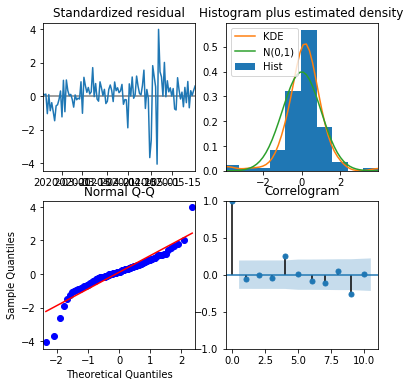

In [91]:
print(decom.summary())
p=decom.plot_diagnostics(figsize=(6,6))

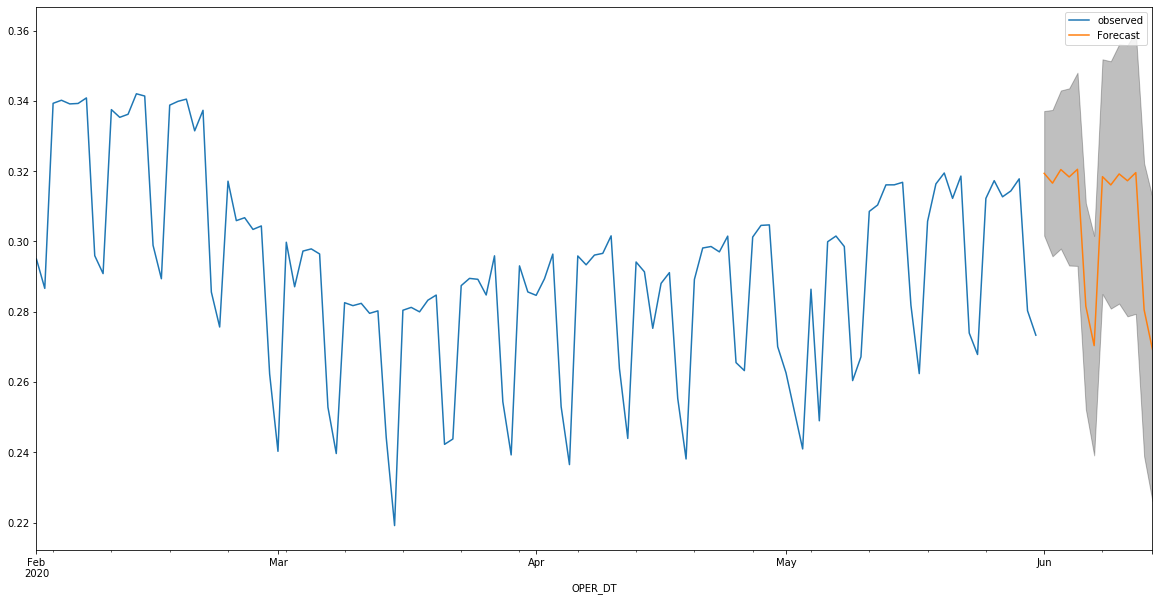

In [92]:
pred=decom.get_forecast(steps=14)
pred_ci=pred.conf_int()

p = df.plot(label='observed',figsize=(20,10))
pred.predicted_mean.plot(ax=p,label='Forecast')
p.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25)
plt.legend()
plt.show()

In [93]:
model=sm.tsa.statespace.SARIMAX(df[1:],order=(2,1,0),seasonal_order=(0,1,1,7),enforce_stationarity=True,enforce_invertibility=True,exog=corona.rolling(2).mean().dropna())
decom = model.fit()

In [94]:
decom

                                      SARIMAX Results                                      
Dep. Variable:                           LCLS_10_P   No. Observations:                  120
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 7)   Log Likelihood                 358.719
Date:                             Mon, 28 Sep 2020   AIC                           -707.439
Time:                                     16:38:17   BIC                           -693.846
Sample:                                 02-02-2020   HQIC                          -701.924
                                      - 05-31-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
confirmed  -1.362e-05   3.44e-05     -0.396      0.692    -8.1e-05    5.37e-05
ar.L1         -0.3526      

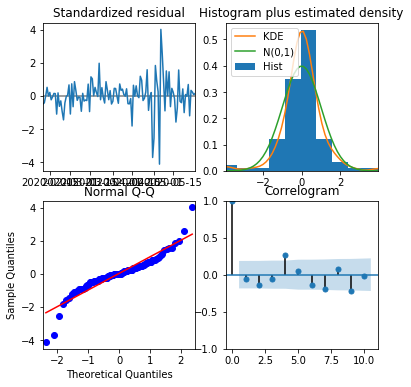

In [95]:
print(decom.summary())
p=decom.plot_diagnostics(figsize=(6,6))

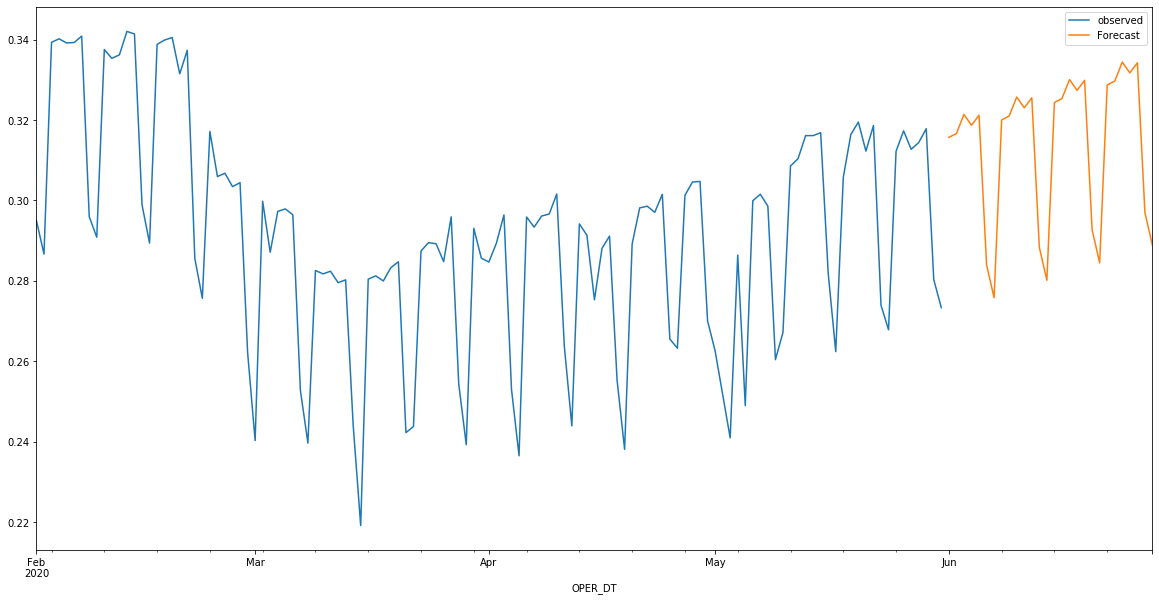

In [96]:
pred=decom.get_forecast(steps=28,exog=[150]*28)
pred_ci=pred.conf_int()

p = df.plot(label='observed',figsize=(20,10))
pred.predicted_mean.plot(ax=p,label='Forecast')
# p.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25)
plt.legend()
plt.show()

# SARIMAX 생성 및 결과분석 함수 정의

In [97]:
day_offline_col = day_offline.columns[1:].tolist()
corona_coef_list=[]
lr_coef_list=[]
after_corona = sorted(random.sample([x for x in range(0,51)],28),reverse=True)
def sarimax_model(df,col='전체 품목'):
    print(col+' Sarimax 예측모델 생성')
    
    decomposition = auto_arima(np.log(df[1:]),start_p=0,start_q=0,max_p=5,max_q=5,m=7,start_P=0,start_Q=0,seasonal=True,
                           max_d=3,D=1,d=1,max_D=3,max_P=3,max_Q=3,trace=False,error_action='ignore',supress_warnings=True,stepwise=False,trend='t')
    print('Auto ARIMA AIC:',round(decomposition.aic(),4))
    model=sm.tsa.statespace.SARIMAX(np.log(df[1:]),order=decomposition.order,seasonal_order=decomposition.seasonal_order,
                                    enforce_stationarity=False,enforce_invertibility=False,exog=corona.rolling(2).mean().dropna())
    print('SARIMAX Params:',decomposition.order,decomposition.seasonal_order)
    decom = model.fit()
    print('SARIMAX AIC:',round(decom.aic,4))
    fig,ax=plt.subplots(figsize=(20,10))
#     last_year=day_offline['2019'][df.name]
#     last_year.index = pd.to_datetime(last_year.index.astype(str).str.replace('2019','2020'),format='%Y-%m-%d')
#     last_year_df=pd.DataFrame(last_year)
#     last_year_df.plot(ax=ax,label='2019',c='k')
    decom.plot_diagnostics()
    pred=decom.get_forecast(steps=28,exog=after_corona)
    pred_ci=pred.conf_int()
    pd.concat([df[1:],np.exp(pred.predicted_mean)]).plot(ax=ax,c='k')
    df[1:].plot(label='observed',ax=ax)
    np.exp(pred.predicted_mean).plot(ax=ax,label='Forecast')
    ax.set_title(col,fontproperties=font,size=18)
    o=sm.tsa.seasonal_decompose(pd.concat([df[1:],np.exp(pred.predicted_mean)])).trend['2020-06']
    o=o.reset_index(drop=True).dropna()
    lr = LinearRegression()
    lr.fit(np.array(o.index).reshape(-1,1),o.values)
    print('일일 확진자 수 데이터 계수:',decom.params['confirmed'])
    print('예측된 평균 매출지표 추세선의 기울기:',lr.coef_[0])
    corona_coef_list.append(decom.params['confirmed'])
    lr_coef_list.append(lr.coef_)
    ax.set_xlabel('')
    ax.set_ylabel('일 평균 매출 지표',fontproperties=font)
    plt.show()
def make_model(df_all_col):
    for col in day_offline_col:
        sarimax_model(df_all_col[col],category_dict[int(col[5:7])])
    sarimax_model(df_all_col['AMT_IND'])
make_model(day_offline['2020'])
    

식사 Sarimax 예측모델 생성


KeyboardInterrupt: 

In [ ]:
for x,y in zip(corona_coef_list,category_dict.values()):
    print('{}상품 corona 확진자 계수: {:.5f}'.format(y,x))

In [ ]:
for x,y in zip(lr_coef_list,category_dict.values()):
    print('{:<7}상품 추세선 기울기: {:.9f}'.format(y,x[0]))

# WORDCLOUD

In [104]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl

In [105]:
df_sns = pd.read_csv("../input/bigcontest-data/data/03_SNS데이터(와이즈넛)/2020 bigcontest data_wisenut.csv", engine = "python", encoding = "utf-8", sep = "")

In [106]:
word_list = []
for column in df_sns.columns:
    if "UP_TOPIC_2020" in column: # 2020년 상승 키워드 columns만 집계
        word_list.append(column)
print(word_list)
main = df_sns[word_list].sum().sum()

['UP_TOPIC_202002', 'UP_TOPIC_202003', 'UP_TOPIC_202004', 'UP_TOPIC_202005']


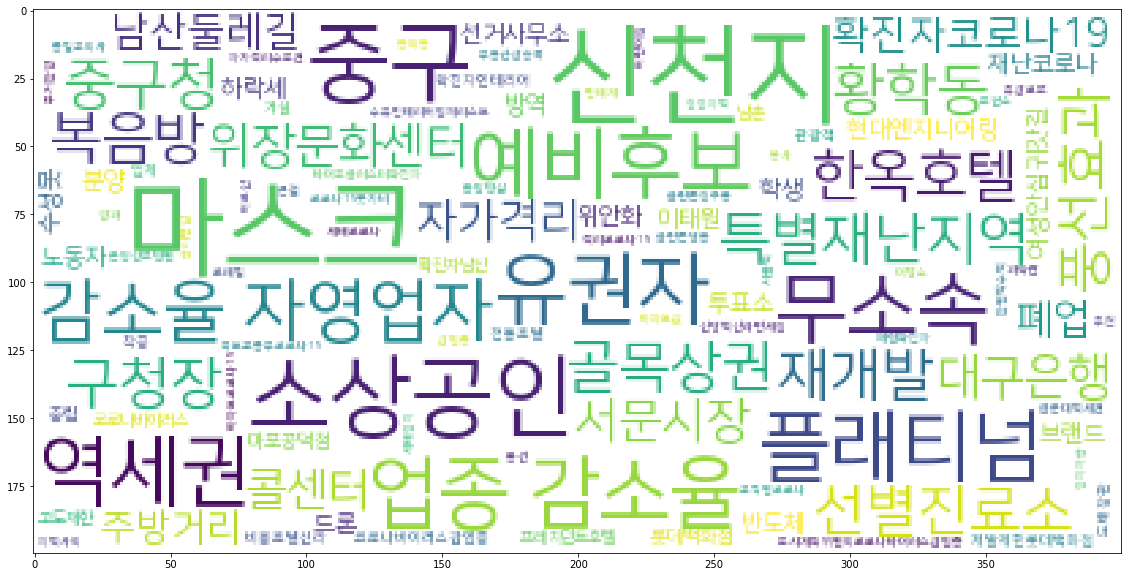

In [107]:
stopwords = set(STOPWORDS)

stopwords={'코로나19','코로나','확진자','미래통합당'} # stopword setting / 빈도수가 너무 높다.
wordcloud = WordCloud(
                        font_path = '../input/nanum34/NanumSquareR.ttf',
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42,
                          width=400,
                          height=200
                         ).generate(main)

print(wordcloud)
fig, ax = plt.subplots(figsize = (20, 10))
fig = plt.figure(1)
plt.imshow(wordcloud)

plt.show()
fig.savefig("word1.png", dpi=900)

# 물류 데이터 분석

In [110]:
df = pd.read_excel("../input/bigcontest-data/data/05_물류데이터(CJ올리브네트웍스)/2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx")

## 📌 테이블 정의서
#### 기본 정보
* 테이블명 : 일자별 행정동별 카테고리별 물류 건수
* 테이블 개요 : [적재주기:일단위] 기준지역 내 일자별 카테고리별 물류 건수

#### 특기사항
* 기간 : 19년 2월 1일 - 19년 5월 31일, 20년 2월 1일~20년 5월 31일
* 지역 : 대구(수성구, 중구), 서울(노원구, 중구) 내 전 행정동
* 카테고리별(대분류기준) 송장 건수


## 데이터 전처리 _ 날짜변경

In [ ]:
df_shipping = df.copy()
df_shipping.rename(columns={"DL_YMD":"배송년월일"}, inplace=True)
df_shipping.rename(columns={"DL_GD_LCLS_NM":"배송상품대분류명"}, inplace=True)
df_shipping.rename(columns={"DL_GD_LCLS_CD":"배송상품대분류코드"}, inplace=True)
df_shipping.rename(columns={"CTPV_NM":"시도명"}, inplace=True)
df_shipping.rename(columns={"CTPV_CD":"시도코드"}, inplace=True)
df_shipping.rename(columns={"CTGG_NM":"시군구명"}, inplace=True)
df_shipping.rename(columns={"CTGG_CD":"시군구코드"}, inplace=True)
df_shipping.rename(columns={"HDNG_NM":"행정동명"}, inplace=True)
df_shipping.rename(columns={"HDNG_CD":"행정동코드"}, inplace=True)
df_shipping.rename(columns={"INVC_CONT":"송장건수"}, inplace=True)

In [ ]:
df_shipping.head()

In [ ]:
df_shipping['배송날짜'] = df_shipping['배송년월일'] +20000000

In [ ]:
df_shipping.head()

In [ ]:
df_shipping.info()

In [ ]:
df_shipping['배송날짜'] = pd.to_datetime(df_shipping['배송날짜'], format='%Y%m%d')

In [ ]:
df_shipping.info()

In [ ]:
df_shipping.head()

In [ ]:
df_shipping['배송연도']=pd.DatetimeIndex(df_shipping['배송날짜']).year
shipping_2019=df_shipping[df_shipping.배송날짜<'2020']
shipping_2019['배송날짜']=shipping_2019['배송날짜'].apply(lambda x: x.strftime('%m-%d'))
shipping_2020=df_shipping[df_shipping.배송날짜>'2019']
shipping_2020['배송날짜']=shipping_2020['배송날짜'].apply(lambda x: x.strftime('%m-%d'))
p = shipping_2020[shipping_2020.배송연도==2019]
shipping_2020 = shipping_2020.loc[76892:]
shipping_2020.head()

In [ ]:
df_shipping['배송상품대분류명'].unique()

# 2월~5월 전국 송장건수 전년대비 비교 
## ✔️전년도 대비 전체 송장건수 증가
* 2020년 5월에 아웃라이어 
-> 정부는 3월 22일부터 4월 19일까지를 '고강도 거리두기', 4월 20일부터 5월 5일까지를 '완화된 거리두기' 실천기간으로 정해 사회적 이동을 줄이는 조치를 해왔다.
-> 사회적 거리두기 황금연휴 기간인 5월 5일까지는 사회적 거리두기 반드시 지킬것을 요청했다.
-> 중앙재난안전대책본부는 5월 6일부터 시작하는 생활 속 거리 두기 안전수칙을 발표했다. (생활 속 거리 두기 기간에는 원칙적으로 모든 시설의 운영이 가능하지만, 시설별 위험도를 고려해 입장 인원을 제한하는 등 위험도를 가능한 낮출 수 있는 방역 조치를 마련하면서 점진적으로 운영을 재개할 예정.) 

In [ ]:
shipping_change_rate=pd.DataFrame((shipping_2020.groupby('배송상품대분류명')['송장건수'].sum()
                      - shipping_2019.groupby('배송상품대분류명')['송장건수'].sum())/(shipping_2019.groupby('배송상품대분류명')['송장건수'].sum())*100)
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=shipping_change_rate,x=shipping_change_rate.index,y='송장건수',ax=ax,color='b')
ax.set_title('상품별 전년대비 송장건수 증가율',fontproperties=font,size=14)
ax.set_xlabel('상품 분류',fontproperties=font,size=14)
ax.set_ylabel("송장건수 증가율 (%)",fontproperties=font)
ax.set_xticklabels(shipping_change_rate.index,fontproperties=font,size=14)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter(shipping_2019["배송날짜"], shipping_2019["송장건수"],
color="red", label="2019") 

ax.scatter(shipping_2020["배송날짜"], shipping_2020["송장건수"],
color="blue", label="2020") 

ax.legend()
ax.set_xlabel("배송날짜",fontproperties=font) 
ax.set_ylabel("송장건수",fontproperties=font)
# plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
plt.show()
      

In [ ]:
line_shipping_2019 = shipping_2019.groupby(['배송날짜'])[['송장건수']].sum()
line_shipping_2020 = shipping_2020.groupby(['배송날짜'])[['송장건수']].sum()

In [ ]:
line_shipping_2019.plot(figsize=(20,5), color='blue')
plt.title('2019년 송장건수 추이')
plt.yticks([25000, 50000, 75000, 100000, 125000, 150000, 175000])

line_shipping_2020.plot(figsize=(20,5), color='red')
plt.title('2020년 송장건수 추이')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

sns.lineplot(line_shipping_2019.index,line_shipping_2019["송장건수"],color="red", label="2019") 
sns.lineplot(line_shipping_2020.index.drop('02-29'), line_shipping_2020["송장건수"].drop('02-29'),color="blue", label="2020") 

ax.legend()
ax.set_xlabel("배송날짜",fontproperties=font) 
ax.set_ylabel("송장건수",
              fontproperties=font)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
plt.show()

## ✔️2019년 전국 상위 송장건수 업종:
==> 1위. 패션의류, 2위: 식품, 3위: 생활건강

## ✔️2020년 전국 상위 송장건수 업종:
==> 1위. 식품, 2위: 생활건강, 3위:패션의류


* 추가 정보
`생활건강`: 생활용품, 생활잡화, 건강관리용품, 온열/찜질 용품, 애완 등 (카테고리 내 상품군을 보면, '실내'에서 사용하는 용품임을 파악할 수 있다.)

In [ ]:
#2019년 전국 상위 송장건수 업종
t1 = shipping_2019.groupby(['배송상품대분류명'])[['송장건수']].mean().round().sort_values(by='송장건수')
t1.plot(kind="barh")
#2020년 전국 상위 송장건수 업종
t2 = shipping_2020.groupby(['배송상품대분류명'])[['송장건수']].mean().round().sort_values(by='송장건수')
t2.plot(kind="barh")


In [ ]:
plt.figure(figsize=(20,3))
chart= sns.relplot(data=df_shipping, x="배송상품대분류명", y="송장건수", hue="시도명", kind='scatter', col='배송연도')
chart.set_xticklabels(rotation=45)

In [ ]:
plt.figure(figsize=(20,3))
chart= sns.barplot(data=df_shipping, x="배송상품대분류명", y="송장건수", hue="배송연도", color='royalblue')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(shipping_2019["배송상품대분류명"], shipping_2019["송장건수"],
color="red",alpha=0.6, label="2019") 
ax.scatter(shipping_2020["배송상품대분류명"], shipping_2020["송장건수"],
color="blue", alpha=0.2, label="2020") 

ax.legend()
ax.set_xlabel("배송상품대분류명") 
ax.set_ylabel("송장건수")

plt.show()
      

## 업종별 시계열 상 빈도 차이 

In [ ]:
#업종별 코드번호 확인
column_values = shipping_2019[['배송상품대분류코드', '배송상품대분류명']].values.ravel()
unique_values = pd.unique(column_values)
print(unique_values)

### 스포츠/레저 송장건수 

In [ ]:
sports_2019 = shipping_2019[shipping_2019['배송상품대분류코드'] == 16]
sports_2020 = shipping_2020[shipping_2020['배송상품대분류코드'] == 16]

In [ ]:
#2019년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(sports_2019['배송날짜'],sports_2019['송장건수'], color='green', label="2019",alpha=0.5) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 전국 스포츠/레저 송장건수',fontproperties=font)
ax.legend()
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)


#2020년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(sports_2020['배송날짜'], sports_2020['송장건수'],
color='orange', label='2020',alpha=0.5)
ax.set_title('2020년 전국 스포츠/레저 송장건수',fontproperties=font)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
plt.yticks([0, 50, 100, 150, 200])
ax.legend()

#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(sports_2019['배송날짜'], sports_2019['송장건수'], color='green', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 2020년 스포츠/레저 송장건수',fontproperties=font)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)


ax.scatter(sports_2020['배송날짜'], sports_2020['송장건수'],
color='orange', label='2020',alpha=0.5)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
ax.legend()

plt.show()

### 생활건강 송장건수

In [ ]:
health_2019 = shipping_2019[shipping_2019['배송상품대분류코드'] == 15]
health_2020 = shipping_2020[shipping_2020['배송상품대분류코드'] == 15]

In [ ]:
#2019년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(health_2019['배송날짜'],health_2019['송장건수'], color='hotpink', label="2019",alpha=0.5) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 전국 생활건강 송장건수',fontproperties=font)
ax.legend()
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)

#2020년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(health_2020['배송날짜'], health_2020['송장건수'],
color='royalblue', label='2020',alpha=0.5)
ax.set_title('2020년 전국 생활건강 송장건수',fontproperties=font)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
plt.yticks([0, 250, 500, 750, 1000, 1250, 1500,1750])
ax.legend()

#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(health_2019['배송날짜'], health_2019['송장건수'], color='hotpink', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 2020년 생활건강 송장건수',fontproperties=font)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)

ax.scatter(health_2020['배송날짜'], health_2020['송장건수'],
color='royalblue', label='2020',alpha=0.5)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
ax.legend()
plt.yticks([0, 250, 500, 750, 1000, 1250, 1500,1750])
plt.show()

### 식품 송장건수

In [ ]:
food_2019 = shipping_2019[shipping_2019['배송상품대분류코드'] == 17]
food_2020 = shipping_2020[shipping_2020['배송상품대분류코드'] == 17]

In [ ]:
#2019년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(food_2019['배송날짜'],food_2019['송장건수'], color='violet', label="2019",alpha=0.5) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 전국 식품 송장건수',fontproperties=font)
ax.legend()
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])

#2020년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(food_2020['배송날짜'], food_2020['송장건수'],
color='gold', label='2020',alpha=0.5)
ax.set_title('2020년 전국 식품 송장건수',fontproperties=font)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
ax.legend()

#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(food_2019['배송날짜'], food_2019['송장건수'], color='violet', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 2020년 식품 송장건수',fontproperties=font)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])


ax.scatter(food_2020['배송날짜'], food_2020['송장건수'],
color='gold', label='2020',alpha=0.5)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
ax.legend()

plt.show()

### 도서/음반 송장건수 

In [ ]:
culture_2019 = shipping_2019[shipping_2019['배송상품대분류코드'] == 12]

In [ ]:
culture_2020 = shipping_2020[shipping_2020['배송상품대분류코드'] == 12]

In [ ]:
#2019년 도서/음반 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(culture_2019['배송날짜'], culture_2019['송장건수'], color='blue', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 전국 도서/음반 송장건수',fontproperties=font)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
ax.legend()

#2020년 도서/음반 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(culture_2020['배송날짜'], culture_2020['송장건수'],
color='red', label='2020',alpha=0.5)
ax.set_title('2020년 전국 도서/음반 송장건수',fontproperties=font)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
ax.legend()

#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(culture_2019['배송날짜'], culture_2019['송장건수'], color='blue', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 2020년 도서/음반 송장건수',fontproperties=font)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)


ax.scatter(culture_2020['배송날짜'], culture_2020['송장건수'],
color='red', label='2020',alpha=0.5)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
ax.legend()
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
plt.grid(b=None)
plt.show()

### 가구/인테리어 송장건수 

In [ ]:
### 10 '가구/인테리어' 송장건수 
interior_2019 = shipping_2019[shipping_2019['배송상품대분류코드'] == 10]
interior_2020 = shipping_2020[shipping_2020['배송상품대분류코드'] == 10]

In [ ]:
#2019년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(interior_2019['배송날짜'],interior_2019['송장건수'], color='coral', label="2019",alpha=0.5) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 전국 가구/인테리어 송장건수',fontproperties=font)
ax.legend()
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)

#2020년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(interior_2020['배송날짜'], interior_2020['송장건수'],
color='dodgerblue', label='2020',alpha=0.5)
ax.set_title('2020년 전국 가구/인테리어 송장건수',fontproperties=font)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
ax.legend()

#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(interior_2019['배송날짜'], interior_2019['송장건수'], color='coral', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 2020년 가구/인테리어 송장건수',fontproperties=font)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)


ax.scatter(interior_2020['배송날짜'], interior_2020['송장건수'],
color='dodgerblue', label='2020',alpha=0.5)
ax.set_xticklabels(shipping_2020["배송날짜"].unique(),rotation=90)
ax.legend()

plt.show()

## 대구광역시 행정동별 송장건수 2019년 2020년 비교

In [ ]:
shipping=df_shipping[df_shipping.배송날짜>'2018']
shipping['배송날짜']=shipping['배송날짜'].apply(lambda x: x.strftime('%m-%d'))

In [ ]:
plt.figure(figsize=(20,3))
ax=sns.barplot(data=shipping[shipping['시도명']=='대구광역시'], x="행정동명", y="송장건수", hue="배송연도",ci=None, palette='rocket')
plt.xticks(rotation=50)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
ax.set_xticklabels(shipping[shipping['시도명']=='대구광역시'].행정동명,fontproperties=font)
plt.show()

## 대구 행정동별 송장건수 증감률 비교

In [ ]:
daegu = shipping[shipping['시도명']=='대구광역시']

In [ ]:
d20 = daegu[daegu['배송연도']==2020].groupby(['행정동명'])['송장건수'].sum()
d19 = daegu[daegu['배송연도']==2019].groupby(['행정동명'])['송장건수'].sum()

In [ ]:
#대구 행정동별 송장건수 증감률
fig,ax=plt.subplots(1,1,figsize=(10,5))
diff_daegu = (d20-d19)/d19*100
ax.set_xticklabels(shipping[shipping['시도명']=='대구광역시'].행정동명,fontproperties=font)
diff_daegu.plot(kind='bar',ax=ax)

In [ ]:
#대구 송장건수 증감률 상위 5개 지역
diff_daegu.sort_values(ascending=False).head(5)

## 서울특별시 행정동별 송장건수 2019년 2020년 비교

In [ ]:
## 대구/서울 행정동별 송장건수 증감률 비
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=shipping[shipping['시도명']=='서울특별시'], x="행정동명", y="송장건수", hue="배송연도",ci=None, palette='rocket')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
seoul = shipping[shipping['시도명']=='서울특별시']

In [ ]:
s20 = seoul[seoul['배송연도']==2020].groupby(['행정동명'])['송장건수'].sum()
s19 = seoul[seoul['배송연도']==2019].groupby(['행정동명'])['송장건수'].sum()

## 서울 행정동별 송장건수 증감률 비교

In [ ]:
## 대구 행정동별 송장건수 증감률 비교#서울 행정동별 송장건수 증감률
diff_seoul = (s20-s19)/s19*100
plt.figure(figsize=(15,5))
diff_seoul.plot(kind='bar')
plt.xticks(rotation=60)
plt.grid()

# 카드매출 데이터 분석

In [111]:
df_resident=pd.read_csv("../input/bigcontest-data/data/02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt", sep = "\t")

In [ ]:

#date컬럼 추가 
df_resident["date"]=pd.to_datetime(df_resident["STD_DD"], format= '%Y%m%d')
df_resident["date"]

In [ ]:
#2019와 2020 분리
df_resident_2019=df_resident[df_resident["date"] <= "2019-05-31"]
df_resident_2020=df_resident[df_resident["date"] >= "2020-02-01"]

#날짜별_이용건수 그루핑
cnt_by_date_19 = df_resident_2019.groupby("date")["USE_CNT"].sum()
cnt_by_date_20 = df_resident_2020.groupby("date")["USE_CNT"].sum()

# 📊 2월~5월 전체 카드 이용건수

In [ ]:
fig, ax = plt.subplots(2,1)

ax[0].plot(cnt_by_date_19) 
ax[1].plot(cnt_by_date_20, color='red')
plt.show()

In [ ]:
df_resident_2019["+1000"]=df_resident_2019["STD_DD"]+10000
df_resident_2019

df_resident_2019["date_20"]=pd.to_datetime(df_resident_2019["+1000"], format= '%Y%m%d')
df_resident_2019

In [ ]:
df_res_2019=df_resident_2019.set_index('date')
df_res_2020=df_resident_2020.set_index('date')

In [ ]:
df_res_2019_amt=df_res_2019.resample('M').mean()['USE_AMT']
df_res_2019_amt.index=df_res_2019_amt.index.month
df_res_2020_amt=df_res_2020.resample('M').mean()['USE_AMT']
df_res_2020_amt.index=df_res_2020_amt.index.month

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
sns.lineplot(data=df_res_2019_amt,marker='o',ax=ax,label='2019')
sns.lineplot(data=df_res_2020_amt,marker='o',ax=ax,label='2020')
plt.xticks([2,3,4,5],fontproperties=font,size=14)
plt.ylabel('일 평균 매출액 (천 원)',fontproperties=font,size=14)
plt.xlabel('월',fontproperties=font,size=14)
plt.title('2019년 2020년 월 평균 카드매출액',fontproperties=font,size=16)
plt.legend()
plt.show()

In [ ]:
df=df_resident.set_index('date')
df.head()

In [113]:
dong_code=pd.read_excel('../input/bigcontest-data/data/02_카드매출데이터(신한카드)/02_혁신아이디어분야_카드소비데이터(신한카드)_데이터정의서.xlsx',sheet_name='(참고) 행정동코드')
dong_code_dict=dong_code.iloc[1:,[2,4]].set_index('Unnamed: 2').to_dict()['Unnamed: 4']
dong_code_dict

{'520': '범어2동',
 '540': '범어4동',
 '550': '만촌1동',
 '570': '수성1가동',
 '580': '수성2.3가동',
 '590': '수성4가동',
 '605': '을지로동',
 '615': '신당동',
 '625': '중계2.3동',
 '635': '약수동',
 '645': '청구동',
 '650': '남산2동',
 '665': '상계3.4동',
 '670': '남산4동',
 '680': '대봉1동',
 '560': '만촌2동',
 '595': '대신동',
 '600': '공릉2동',
 '611': '하계1동',
 '612': '하계2동',
 '619': '중계본동',
 '621': '중계1동',
 '624': '중계4동',
 '630': '파동',
 '640': '남산1동',
 '695': '상계6.7동',
 '700': '상계8동',
 '710': '상계9동',
 '720': '상계10동',
 '510': '범어1동',
 '530': '범어3동',
 '561': '만촌3동',
 '601': '황금1동',
 '602': '황금2동',
 '610': '중동',
 '620': '상동',
 '651': '지산1동',
 '652': '지산2동',
 '661': '범물1동',
 '662': '범물2동',
 '690': '대봉2동',
 '517': '동인동',
 '545': '삼덕동',
 '565': '성내1동',
 '575': '성내2동',
 '585': '성내3동',
 '660': '남산3동'}

In [ ]:
df['DONG_CD']=df.DONG_CD.apply(lambda x: dong_code_dict[str(x)])

In [ ]:
df_2019=df['2019']
df_2020=df['2020']

In [ ]:
df_2019

In [ ]:
fig,ax=plt.subplots()
(df_2020.groupby('DONG_CD').median()['USE_AMT']-df_2019.groupby('DONG_CD').median()['USE_AMT']).plot(kind='bar',figsize=(20,10))
ax.set_xticklabels((df_2020.groupby('DONG_CD').median()['USE_AMT']-df_2019.groupby('DONG_CD').median()['USE_AMT']).index,font_properties=font)
plt.show()
#카드매출 중간값 변화량

In [ ]:
fig,ax=plt.subplots()
((df_2020.groupby('DONG_CD').median()['USE_AMT']-df_2019.groupby('DONG_CD').median()['USE_AMT'])/df_2019.groupby('DONG_CD').median()['USE_AMT']).plot(kind='bar',figsize=(20,10))
ax.set_xticklabels((df_2020.groupby('DONG_CD').median()['USE_AMT']-df_2019.groupby('DONG_CD').median()['USE_AMT']).index,font_properties=font)
plt.show()
#카드매출 중간값 증가율

In [ ]:
recovery_dong={}
def get_recovery_ind():
    for dong in df_2020.DONG_CD.unique():
        date_df=df_2020[df_2020.DONG_CD==dong].groupby('date').sum().reset_index()
        q1=date_df['USE_AMT'].quantile(.25)
        q3=date_df['USE_AMT'].quantile(.75)
        iqr = q3-q1
        md=date_df.USE_AMT.median()
        mi = date_df['USE_AMT'].median()-1.5*iqr
        mx = date_df['USE_AMT'].median()+1.5*iqr
        date_df.loc[date_df['USE_AMT']<mi,'USE_AMT']=md
        date_df.loc[date_df['USE_AMT']>mx,'USE_AMT']=md

        x1 = date_df[date_df.USE_AMT==date_df.USE_AMT.min()].index[0]
        y1 = date_df.USE_AMT.min()
        after_min_df = date_df[x1+1:]
        x2 = after_min_df[after_min_df.USE_AMT==after_min_df.USE_AMT.max()].index[0]
        y2 = after_min_df.USE_AMT.max()
        print('=={}==\n 최저매출일:{} 최고매출일:{}\n 회복지수:{:.5f}'.format(dong,date_df.iloc[x1].date,date_df.iloc[x2].date,(y2-y1)/(x2-x1)))
        recovery_dong[dong]=(y2-y1)/(x2-x1)
    
get_recovery_ind()

In [ ]:
recovery_df=pd.DataFrame(recovery_dong.items(),columns=['동','회복지수'])
recovery_df.head()

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=recovery_df,x='동',y='회복지수')
ax.set_xticklabels(recovery_df['동'],fontproperties=font,rotation=60)
plt.show()

In [ ]:
recovery_df # COXDATA 

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
df_2020[df_2020.DONG_CD=='범어4동'].groupby('date').mean().USE_AMT.plot(ax=ax[0])
df_2020[df_2020.DONG_CD=='청구동'].groupby('date').mean().USE_AMT.plot(ax=ax[1])
ax[0].set_ylim([500,5000000])
ax[1].set_ylim([500,5000000])
plt.show()

# 물류, 유통 상관관계 도출

In [ ]:
df_shipping.head()

In [ ]:
offline_sales.head()

In [ ]:
corr_online=df_shipping[df_shipping.배송연도==2020]
corr_offline=offline_sales[offline_sales.year=='2020']

In [ ]:
print(set(corr_online.행정동명.unique()))
print(len(set(corr_online.행정동명.unique())))
print(set(corr_offline.ADMD.unique()))
print(len(set(corr_offline.ADMD.unique())))
print(set(corr_online.행정동명.unique())-set(corr_offline.ADMD.unique()))
# 결측치 관측

In [ ]:
corr_dict={}
corr_rolling_dict={}
corr_week_dict={}
corr_sta_dict={}
def get_corr_onoff():
    for dong in corr_online.행정동명.unique():
        on=corr_online[corr_online.행정동명==dong]
        off=corr_offline[corr_offline.ADMD==dong]
        df=pd.DataFrame([on.groupby('배송년월일').sum()['송장건수'].values,off.AMT_IND.values]).T
        corr = df.corr()[0][1]
        corr_rolling=df.rolling(7).mean().dropna().corr()[0][1]
        corr_week= df.groupby(df.index // 7).sum().corr()[0][1]
        corr_sta=df.diff().diff(7).diff().diff(7).dropna().corr()[0][1]
        corr_dict[dong]=corr
        corr_rolling_dict[dong]=corr_rolling
        corr_week_dict[dong]=corr_week
        corr_sta_dict[dong]=corr_sta
get_corr_onoff()
# print(corr_dict)
        

In [ ]:
fig,ax =plt.subplots(4,1,figsize=(30,10))
corr_df=pd.DataFrame([corr_dict.keys(),corr_dict.values()]).T.dropna()
sns.barplot(data=corr_df,x=0,y=1,ax=ax[0])
ax[0].set_xticklabels(corr_df[0],fontproperties=font,rotation=60)
corr_df=pd.DataFrame([corr_rolling_dict.keys(),corr_rolling_dict.values()]).T.dropna()
sns.barplot(data=corr_df,x=0,y=1,ax=ax[1])
ax[1].set_xticklabels(corr_df[0],fontproperties=font,rotation=60)
corr_df=pd.DataFrame([corr_week_dict.keys(),corr_week_dict.values()]).T.dropna()
sns.barplot(data=corr_df,x=0,y=1,ax=ax[2])
ax[2].set_xticklabels(corr_df[0],fontproperties=font,rotation=60)
corr_df=pd.DataFrame([corr_sta_dict.keys(),corr_sta_dict.values()]).T.dropna()
sns.barplot(data=corr_df,x=0,y=1,ax=ax[3])
ax[3].set_xticklabels(corr_df[0],fontproperties=font,rotation=60)
plt.tight_layout()
plt.show()
# 온라인 오프라인 주 단위 상관관계 그래프

In [ ]:
fig,ax=plt.subplots(figsize=(30,10))
corr_df=pd.DataFrame([corr_sta_dict.keys(),corr_sta_dict.values()]).T.dropna()
sns.barplot(data=corr_df,x=0,y=1,ax=ax)
ax.set_xticklabels(corr_df[0],fontproperties=font,rotation=60,size=14)
plt.tight_layout()
plt.show()

# COX Professional Hazard Model

In [ ]:
count=0
for dong in offline_sales.ADMD.unique():
    t=offline_sales.set_index('OPER_DT')
    t = t[t.ADMD==dong]
    print(dong,t['2019'].AMT_IND.median())
    t.drop(pd.to_datetime('20190213',format="%Y%m%d"),axis=0,inplace=True)
    t.drop(pd.to_datetime('20190214',format="%Y%m%d"),axis=0,inplace=True)
    t.drop(pd.to_datetime('20190215',format="%Y%m%d"),axis=0,inplace=True)
    t.drop(pd.to_datetime('20200213',format="%Y%m%d"),axis=0,inplace=True)
    t.drop(pd.to_datetime('20200214',format="%Y%m%d"),axis=0,inplace=True)
    t.drop(pd.to_datetime('20200215',format="%Y%m%d"),axis=0,inplace=True)
    t.drop(pd.to_datetime('20190313',format="%Y%m%d"),axis=0,inplace=True)
    t.drop(pd.to_datetime('20190314',format="%Y%m%d"),axis=0,inplace=True)
    t.drop(pd.to_datetime('20190315',format="%Y%m%d"),axis=0,inplace=True)
    t.drop(pd.to_datetime('20200313',format="%Y%m%d"),axis=0,inplace=True)
    t.drop(pd.to_datetime('20200314',format="%Y%m%d"),axis=0,inplace=True)
    t.drop(pd.to_datetime('20200315',format="%Y%m%d"),axis=0,inplace=True)
    for ind,a in zip(t['2020-04':].index,t['2020'].AMT_IND['2020-04':]):
        if a > t['2019'].AMT_IND.median():
#             print(dong,a)
            count+=1
            print(dong,ind)
            break
    
    

    

In [ ]:
print(count)

# OUTLIER

In [ ]:
dong_off=offline_sales[offline_sales.ADMD=='범물1동'].set_index('OPER_DT')['2020']['AMT_IND']
dong_off.head()

In [ ]:
dong_off.plot()
plt.ylim([0.6,1.1])
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(dong_off,orient='v')
plt.show()


In [ ]:
q1=dong_off.quantile(.25)
q3=dong_off.quantile(.75)
q2=dong_off.quantile(.5)
q4=dong_off.quantile(1)
iqr = q3-q1
print('q1:',round(q1,4))
print('q3:',round(q3,4))
print('IQR:',round(iqr,4))

In [ ]:
mx=q2+1.5*iqr
mi=q2-1.5*iqr

In [ ]:
md=dong_off.median()
dong_off[dong_off<mi]=md
dong_off[dong_off>mx]=md

In [ ]:
dong_off.plot()
plt.ylim([0.6,1.1])
plt.show()

# 유동인구 카드매출 동별 corr

In [ ]:
card_df['DONG_NM']=card_df['DONG_CD'].apply(lambda x: dong_code_dict[str(x)])

In [ ]:
corr_dict={}
for col in card_df.DONG_NM.unique():
    df=time_df[time_df.HDONG_NM==col]['2020']
    df['dayflow']=df.loc[:,'TMST_00':].sum(axis=1)
    x=df['dayflow']
    y=card_df.copy()
    y['DONG_CD']=y.DONG_CD.apply(lambda x: dong_code_dict[str(x)])
    y=y.set_index('STD_DD')
    y.index=pd.to_datetime(y.index,format='%Y%m%d')
    y=y[y.DONG_CD==col]['2020']
    y=y.groupby(y.index).sum()['USE_AMT']
    c=pd.DataFrame([x.values,y.values]).T
    cor=c.corr()[0][1]
    corr_dict[col]=cor
print(corr_dict)

# COX DECISION TREE

# 데이터 전처리

In [ ]:
card_median_change=df_2020.groupby('DONG_CD').median()['USE_AMT']-df_2019.groupby('DONG_CD').median()['USE_AMT']
card_median_change.head() # card 전년대비 중간값 변화량
print(card_median_change.index.unique())
print(len(card_median_change.index.unique()))

In [ ]:
flow_rate=pd.read_csv('../input/flow-rate/flow_change_rate.csv')
flow_rate.head() #전년대비 유동인구 감소량
print(flow_rate.HDONG_NM.unique())
print(len(flow_rate.HDONG_NM.unique()))

In [114]:
pop=pd.read_csv('../input/pop-data/202008_202008__ (1).csv',encoding='CP949')

In [ ]:
pop=pop[(pop.행정구역.str.contains('서울특별시 노원구'))|(pop.행정구역.str.contains('서울특별시 중구'))|(pop.행정구역.str.contains('대구광역시 중구'))|(pop.행정구역.str.contains('대구광역시 수성구'))]
pop.head()

In [ ]:
dong_lst=[]
for x in pop.행정구역.tolist():
    st=x.find('구 ')+2
    end=x.find('동(')
    dong_lst.append(x[st:end+1])

In [ ]:
pop.행정구역= dong_lst
pop=pop[pop.행정구역!=''] #69개동 인구수

In [115]:
offline_sales=pd.read_excel('../input/bigcontest-data/data/04_유통데이터(GS리테일)/04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx',sheet_name='종합테이블(TB_DD_STR_PURCH_CLS)')
offline_sales.head()

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,20190201,대구광역시,수성구,고산1동,1.06433557,0.45084761,0.17222093,0.29545809,0.02326287,0.04467943,0.00507460,0.00481966,0.00363682
1,20190201,대구광역시,수성구,고산2동,1.07641799,0.45793662,0.19627353,0.29556381,0.00552103,0.03405573,0.00084376,0.00889254,0.00091298
2,20190201,대구광역시,수성구,고산3동,0.85607140,0.35997760,0.19660249,0.37676160,0.01340777,0.02960601,0.00911737,0.00883059,0.00569657
3,20190201,대구광역시,수성구,두산동,0.72486779,0.28196869,0.17520737,0.36320214,0.02423468,0.13419099,0.00000000,0.02119613,0.00000000
4,20190201,대구광역시,수성구,만촌1동,1.15572808,0.40098349,0.20045413,0.31053125,0.03886803,0.03542653,0.00528373,0.00573365,0.00271919


In [ ]:
offline_sales.OPER_DT=pd.to_datetime(offline_sales.OPER_DT,format='%Y%m%d')
offline_sales.set_index('OPER_DT',inplace=True)
offline_sales.head()

In [ ]:
off=offline_sales['2020'].groupby('ADMD').sum()['AMT_IND']
len(off.index) # 2020년 동별 총  유통매출지수 


In [116]:
sns=pd.read_csv('../input/bigcontest-data/data/03_SNS데이터(와이즈넛)/data_wisenut.csv')
sns=sns.set_index('DONG_NM(삭제)').loc[:,'UP1_POSITIVE_202002':'UP6_POSITIVE_202005']

In [ ]:
col_lst=[]
for col in sns.columns:
    if '2020' in col:
        col_lst.append(col)
sns=sns[col_lst]
sns=sns.sum(axis=1) # 2020 SNS 산업 긍정 언급량
print(sns.index)
print(len(sns.index))

In [ ]:
set(sns.index)

In [ ]:
sns.index=sns.index.str.replace('공릉동','공릉2동')
#남산 2
sns.loc['남산1동']=sns.loc['남산동']/2
sns.loc['남산4동']=sns.loc['남산동']/2
sns.drop('남산동',inplace=True)
#만촌 2
sns.loc['만촌1동']=sns.loc['만촌동']/2
sns.loc['만촌3동']=sns.loc['만촌동']/2
sns.drop('만촌동',inplace=True)
#범물 2
sns.loc['범물1동']=sns.loc['범물동']/2
sns.loc['범물2동']=sns.loc['범물동']/2
sns.drop('범물동',inplace=True)
#범어 4
sns.loc['범어1동']=sns.loc['범어동']/4
sns.loc['범어2동']=sns.loc['범어동']/4
sns.loc['범어3동']=sns.loc['범어동']/4
sns.loc['범어4동']=sns.loc['범어동']/4
sns.drop('범어동',inplace=True)
#상계 4 
sns.loc['상계10동']=sns.loc['상계동']/4
sns.loc['상계3.4동']=sns.loc['상계동']/4
sns.loc['상계6.7동']=sns.loc['상계동']/4
sns.loc['상계9동']=sns.loc['상계동']/4
sns.drop('상계동',inplace=True)
#성내 3
sns.loc['성내1동']=sns.loc['성내동']/3
sns.loc['성내2동']=sns.loc['성내동']/3
sns.loc['성내3동']=sns.loc['성내동']/3
sns.drop('성내동',inplace=True)
#수성 3
sns.loc['수성1가동']=sns.loc['수성동']/3
sns.loc['수성2.3가동']=sns.loc['수성동']/3
sns.loc['수성4가동']=sns.loc['수성동']/3
sns.drop('수성동',inplace=True)
#중계 4
sns.loc['중계1동']=sns.loc['중계동']/4
sns.loc['중계2.3동']=sns.loc['중계동']/4
sns.loc['중계4동']=sns.loc['중계동']/4
sns.loc['중계본동']=sns.loc['중계동']/4
sns.drop('중계동',inplace=True)
#지산 2
sns.loc['지산1동']=sns.loc['지산동']/2
sns.loc['지산2동']=sns.loc['지산동']/2
sns.drop('지산동',inplace=True)
#하계 2
sns.loc['하계1동']=sns.loc['하계동']/2
sns.loc['하계2동']=sns.loc['하계동']/2
sns.drop('하계동',inplace=True)
#황학 2
sns.loc['황금1동']=sns.loc['황금동']/2
sns.loc['황금2동']=sns.loc['황금동']/2
sns.drop('황금동',inplace=True)

In [ ]:
target=list(set(recovery_df.동)&set(card_median_change.index.unique())&set(off.index)&set(flow_rate.HDONG_NM)&set(pop.행정구역)&set(sns.index))
print(len(target))


In [ ]:
recovery_df=recovery_df[recovery_df.동.isin(target)]

In [ ]:
card_median_change=card_median_change[card_median_change.index.isin(target)]

In [ ]:
off=off[off.index.isin(target)]

In [ ]:
flow_rate=flow_rate[flow_rate.HDONG_NM.isin(target)]

In [ ]:
pop=pop[pop.행정구역.isin(target)]

In [ ]:
final_df=recovery_df.copy()

In [ ]:
final_df=final_df.sort_values('동').reset_index(drop=True)
final_df['카드매출_중간값_감소량']=card_median_change.sort_index().values
final_df.head()

In [ ]:
final_df['유통매출지수총합']=off.sort_index().values
final_df.head()

In [ ]:
final_df['유동인구_변화율']=flow_rate.sort_values('HDONG_NM').change_rate.values
final_df.head()

In [ ]:
final_df['총_인구수']=pop.sort_values('행정구역')['2020년08월_총인구수'].str.replace(',','').astype(float).values
final_df.head()

In [ ]:
final_df['SNS_긍정']=sns[sns.index.isin(target)].sort_index().values
final_df.head()

In [ ]:
final_df.info()

In [ ]:
final_df.loc['남산4동']

In [ ]:
final_df.set_index('동',inplace=True)

In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
dt=DecisionTreeRegressor(random_state=928)

In [ ]:
dt.fit(final_df.drop('회복지수',axis=1),final_df['회복지수'])

In [ ]:
dt.feature_importances_

In [ ]:
n_feature = 5
fig,ax=plt.subplots()
idx = np.arange(n_feature)
plt.barh(idx, dt.feature_importances_, align='center')
plt.yticks(idx, final_df.columns)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
ax.set_yticklabels(final_df.columns[1:],fontproperties=font)
plt.show()

In [118]:
!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz

ERROR: Could not find a version that satisfies the requirement webbrowser (from versions: none)
ERROR: No matching distribution found for webbrowser


In [ ]:
export_graphviz(dt, out_file='tree_limited.dot', feature_names = final_df.columns[1:])

In [ ]:
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600

In [ ]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [ ]:
!pip install squarify

In [119]:
!pip install squarify
import squarify
import matplotlib

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

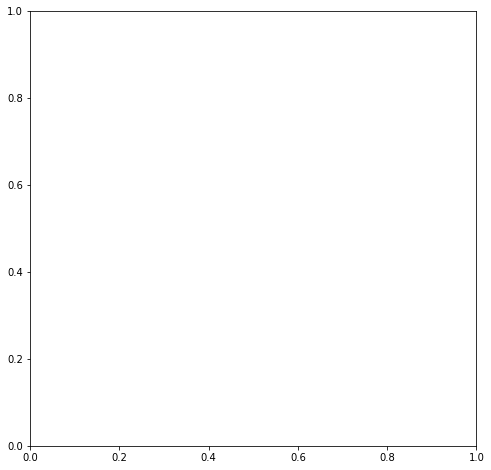

In [120]:
fig,ax=plt.subplots(figsize=(8,8))
colors=['#9370DB','#8770B4','#8977AD','#8B7CA8','#B1A5C8']
# 
norm = matplotlib.colors.Normalize(vmin=min(dt.feature_importances_), vmax=max(dt.feature_importances_))
df = pd.DataFrame({'feature_importances_':dt.feature_importances_, 'feature':final_df.columns[1:] })
squarify.plot(sizes=df['feature_importances_'], label=df['feature'], ax=ax,text_kwargs={'fontproperties':font,'fontsize':12,'color':'black'},color=colors,
              bar_kwargs=dict(linewidth=1, edgecolor="#FFFFFF"))
plt.axis('off')
plt.show()
